# **Analysis of Heart Disease Mortality Data**

#### **Samarth Tuli, Ndenko Fontem, Yi Zhu, Kimia Samieinejad**    


### **Importance of Heart Disease Mortality Research**    

Over the past two decades, people worldwide have experienced a range of physical ailments, from diabetes to arthritis, and mental health disorders, from depression to suicide. This has elevated global health to a top priority for researchers. Among these concerns, heart disease, particularly coronary (ischemic) artery disease, stands out. The [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1) states that heart disease is the leading global cause of death, accounting for 17.9 million deaths annually. Remarkably, 4 out of every 5 heart disease deaths result from heart attacks and strokes. These can arise due to both mental and physical health factors. Additionally, one-third of heart disease deaths tragically affect individuals under 70, underscoring the universality of its threat.
Research spearheaded by organizations like the NIH and WHO identifies diverse behavioral, medical, and socioeconomic risk factors for heart disease mortality. These include tobacco and alcohol consumption, obesity, physical inactivity, malnutrition, high blood pressure, and limited access to primary healthcare. Comorbidities such as diabetes, arthritis, chronic kidney disease, and anxiety can further exacerbate the risk. With vast data available on these factors and the variations in heart disease deaths across countries, data scientists play a crucial role in deciphering insights to inform the trajectory of future research. In our dataset, we define the heart disease mortality rate as the number of related deaths per 100,000 individuals. Our analysis spans all countries from 2012 to 2017, with a focus on North America and Europe.

### **What is coronary heart disease?**

<img src="https://cdn-bohdg.nitrocdn.com/LRSkEHBfAjwsEFOOHlbAXIhAeKQgiLsG/assets/images/optimized/rev-13c2068/www.thekeyholeheartclinic.com/wp-content/uploads/2021/04/Coronary-disease-illustration.jpg" alt="Alt Text" width="300" height="200">

According to the latest research from the NIH, [coronary heart disease](https://www.nhlbi.nih.gov/health/coronary-heart-disease) (CHD) is a type of cardiovascular disease wherein the arteries fail to deliver adequate oxygen to the bloodstream. The primary cause of CHD is the buildup of high cholesterol levels, which forms plaques along the arterial walls. These plaques can restrict blood flow, impair the normal function of blood vessels, and heighten the risk of severe chest pain, heart attacks, strokes, and cardiac arrest. While the threat of CHD can be diminished through lifestyle modifications, many individuals delay or neglect taking preventive measures. Consequently, the disease has become pervasive worldwide, leading to 650,000 deaths each year attributed to generalized heart disease. In the US alone, 11% of adults are diagnosed with heart disease, resulting in 366,000 annual deaths specifically from CHD. This context underscores the urgent need for data scientists to analyze heart disease mortality data, extracting key insights to reduce risks for future patients.


### **Tutorial Purpose**



<img src="https://gurukultheschool.com/blog/wp-content/uploads/2019/12/Student-Participation-is-Instrumental-in-the-Teaching-Learning-Process.jpg" alt="Alt Text" width="300" height="200">

The aim of this tutorial is to analyze various factors influencing heart disease mortality rates across countries. By understanding these factors, we can prioritize research areas to minimize heart disease-related deaths, especially in North America and European nations. Data science is an invaluable tool in this endeavor, offering the capability to distill intricate mortality data into actionable insights. We will guide users through a five-stage pipeline:
Data collection and processing,
Exploratory data analysis and visualizations,
Hypothesis testing and application of ML models,
Analysis,
Derivation of insights leading to informed policy decisions.
By following this approach, researchers and policymakers will be better equipped to implement measures that effectively address the heart disease epidemic.
This revision provides a clearer structure, breaking down the steps in the process and presenting the information in a more streamlined manner.

## **Data Collection and Processing**
<img src="https://images.ctfassets.net/3viuren4us1n/288E0SWjmRgYQScyJeXpwt/19e6700ccf4f32dd638d73adad8279cc/data-collection---resized-3.jpg?fm=webp&w=1920" alt="Alt Text" width="300" height="200">

We sourced data from the Global Health Observatory database of the [World Health Organization](https://www.who.int/data/gho) (WHO). Established by the United Nations, the WHO is a specialized agency tasked with coordinating global health activities and assisting governments worldwide in enhancing their healthcare systems. From the WHO, we extracted data for each country and year on several input features: age-standardized suicide rate (per 100,000 people), mean BMI, raised blood pressure, mean HDL cholesterol, mean systolic blood pressure, health expenditure as a percentage of GDP, and the percentage of overweight adults.
Additionally, we gathered data from [Our World in Data](https://ourworldindata.org/) on the heart disease mortality rate (deaths per 100,000 people), which serves as our target feature for prediction. We also secured information on two more input features: deaths caused by type 1 and 2 diabetes for each country. Our World in Data is an online scientific publication addressing global challenges such as poverty, disease, and inequality.
We accumulated data spanning 2012-2017 for all nine features, including the heart disease mortality rate, from both WHO and Our World in Data, covering all 183 countries. However, we encountered some challenges. Not all datasets provided comprehensive data for all 183 countries or for our designated year range (2012-2017) for each feature. To address these gaps, we used imputation via linear regression to predict and populate the missing values for each input feature.

In [142]:
# packages for data collection and processing
import numpy as np
import pandas as pd
import seaborn as sns

# packages for plotting graphs (feature visualization)
import matplotlib.pyplot as plt
import plotly.express as plex

# packages for hypothesis testing
import statsmodels.formula.api as smf
import statsmodels.api as sm

# packages for ML and normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# package for displaying map images
from IPython.display import Image


### **Add heart disease mortality (death rate) data**

<img src="https://media.istockphoto.com/id/1088266032/vector/heart-shape-emoticons.jpg?s=612x612&w=0&k=20&c=hpafOxKsA3ILIBCIfcCJDcXuXbGgcHuWdRsAz2KcSug=" alt="Alt Text" width="300" height="200">

The first step we will take is to import the [heart disease death rate](https://ourworldindata.org/grapher/cardiovascular-disease-death-rates) (target feature) data and remove the columns we won't use. This feature is an age-standardized estimate for both sexes and has data from 1990-2019 but we will only be using the rows from 2012-2017 in this table.

In [143]:
# Import and process age-standardized heart disease death rates data for both sexes (# of heart disease deaths per 100000 people)
heart_disease_death_rates = pd.read_csv('data/cardiovascular-disease-death-rates.csv')
heart_disease_death_rates = heart_disease_death_rates[['Entity', 'Year', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']]
heart_disease_death_rates = heart_disease_death_rates.rename(columns = {"Entity":"Country", 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)':'Heart Disease Mortality Rate (Deaths per 100K people)'})
heart_disease_death_rates = heart_disease_death_rates[(heart_disease_death_rates['Year']>=2012) & (heart_disease_death_rates['Year']<=2017)]
heart_disease_death_rates = heart_disease_death_rates.reset_index(drop = True)
percentage_missing_values_heart_disease_mortality = ((float(heart_disease_death_rates['Heart Disease Mortality Rate (Deaths per 100K people)'].isna().sum()))/heart_disease_death_rates['Heart Disease Mortality Rate (Deaths per 100K people)'].count()) * 100.0
print("Percentage Missing Values: ", percentage_missing_values_heart_disease_mortality)
heart_disease_death_rates

Percentage Missing Values:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people)
0,Afghanistan,2012,618.45
1,Afghanistan,2013,607.69
2,Afghanistan,2014,600.55
3,Afghanistan,2015,597.02
4,Afghanistan,2016,591.59
...,...,...,...
1363,Zimbabwe,2013,331.36
1364,Zimbabwe,2014,330.58
1365,Zimbabwe,2015,329.57
1366,Zimbabwe,2016,327.64


### **Add anxiety disorder prevalence data**
<img src="https://static.thenounproject.com/png/3396223-200.png" alt="Alt Text" width="300" height="200">


The second step we will take is to import the [anxiety disorder prevalence data](https://ourworldindata.org/grapher/anxiety-disorders-prevalence?tab=chart) and remove the columns we aren't going to use. This feature is an age-standardized estimate and is a % of each country's population that comes from Our World in Data. The anxiety prevalence table includes data from 2012-2017 for both sexes. There are no missing values in the anxiety data before joining, so no imputation is required. However, after merging the anxiety data with the heart disease mortality data frame, we can see that 6.5% of the anxiety data has missing values in the main data frame. Therefore, we have to fill each missing value with the average anxiety prevalence for that particular year. After doing so, there are no more missing values. Hoewver, we must remember to account for potential bias.

In [144]:
# Import and process % of population with anxiety disorders data for both sexes
# Extract 3 fields (country, year, and anxiety disorder prevalence
anxiety_prevalence_all_countries = pd.read_csv('data/anxiety-disorders-prevalence.csv')
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries[['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries[(anxiety_prevalence_all_countries['Year']>=2012) & (anxiety_prevalence_all_countries['Year']<=2017)]
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.rename(columns = {'Entity':'Country', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':"% of population with anxiety disorders"})
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.sort_values(by = ['Country', 'Year'])
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.reset_index(drop = True)
# Compute % of missing values in anxiety disorder data
percentage_missing_values_anxiety_before = ((float(anxiety_prevalence_all_countries['% of population with anxiety disorders'].isna().sum()))/anxiety_prevalence_all_countries['% of population with anxiety disorders'].count()) * 100.0
print("Percent Missing Anxiety Values Before Join: ", percentage_missing_values_anxiety_before)
# Substituting all NaN values in anxiety col of main dataframe with mean values of corresponding years
heart_disease_death_rates['% of population with anxiety disorders'] = anxiety_prevalence_all_countries['% of population with anxiety disorders']
heart_disease_death_rates['% of population with anxiety disorders'] = heart_disease_death_rates['% of population with anxiety disorders'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['% of population with anxiety disorders'] == 0.0:
        anxiety_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['% of population with anxiety disorders']
        mean_anxiety = anxiety_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, '% of population with anxiety disorders'] = mean_anxiety
# Compute % of missing values in anxiety after join
percentage_missing_values_anxiety_after = ((float(heart_disease_death_rates['% of population with anxiety disorders'].isna().sum()))/heart_disease_death_rates['% of population with anxiety disorders'].count()) * 100.0
print("Percent Missing Anxiety Values After Join and Imputation: ", percentage_missing_values_anxiety_after)
# Outputting heart disease death rates df with anxiety column
heart_disease_death_rates

Percent Missing Anxiety Values Before Join:  0.0
Percent Missing Anxiety Values After Join and Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders
0,Afghanistan,2012,618.45,4.739260
1,Afghanistan,2013,607.69,4.766758
2,Afghanistan,2014,600.55,4.793179
3,Afghanistan,2015,597.02,4.810425
4,Afghanistan,2016,591.59,4.815518
...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508
1364,Zimbabwe,2014,330.58,4.119858
1365,Zimbabwe,2015,329.57,4.124367
1366,Zimbabwe,2016,327.64,4.126087


### **Add BMI data**

<img src="https://w7.pngwing.com/pngs/842/828/png-transparent-footprint-computer-icons-bmi-child-text-logo-thumbnail.png" alt="Alt Text" width="300" height="200">

For the third step, we'll import the [mean BMI data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/mean-bmi-(kg-m-)-(age-standardized-estimate)) and remove columns we don't need. This dataset is sourced from the World Health Organization and spans from 2012 to 2017. While the table separates BMI data by sex, we'll focus exclusively on the combined mean BMI, which averages values for both sexes. Before merging, 2.09% of the BMI data points are missing. After integrating the BMI data with the heart disease mortality dataset, the missing values jump to 43.25%. To address this, we'll impute by replacing each missing entry with the average mean BMI for the respective year. With this method, we eliminate all missing values, but it's crucial to acknowledge that this approach might introduce some bias.

In [145]:
# Import and process mean BMI data for both sexes
bmi_all_countries = pd.read_csv('data/BMI.csv')
bmi_all_countries = bmi_all_countries[['Location', 'Period', 'Dim1','FactValueNumeric']]
bmi_all_countries = bmi_all_countries.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Mean BMI"})
bmi_all_countries = bmi_all_countries[bmi_all_countries["Sex"] == "Both sexes"]
# Sort data frame by country and year and reset index
bmi_all_countries = bmi_all_countries.sort_values(by=['Country', 'Year'])
bmi_all_countries = bmi_all_countries.reset_index(drop = True)
bmi_all_countries = bmi_all_countries[['Country', 'Year', 'Mean BMI']]
# Compute % of missing values in BMI data frame before join
percentage_missing_values_bmi_before = ((float(bmi_all_countries['Mean BMI'].isna().sum()))/bmi_all_countries['Mean BMI'].count()) * 100.0
print("Percentage of Missing Values for Mean BMI Before Join: ", percentage_missing_values_bmi_before)
# Merge BMI data with heart disease mortality data frame, Substituting all NaN values in BMI col of main dataframe with mean values of corresponding years
heart_disease_death_rates['Mean BMI'] = bmi_all_countries['Mean BMI']
heart_disease_death_rates['Mean BMI'] = heart_disease_death_rates['Mean BMI'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Mean BMI'] == 0.0:
        bmi_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Mean BMI'].dropna()
        bmi_mean = bmi_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Mean BMI'] = bmi_mean
# Compute % of missing values in BMI after join
percentage_missing_values_bmi_after = ((float(heart_disease_death_rates['Mean BMI'].isna().sum()))/heart_disease_death_rates['Mean BMI'].count()) * 100.0
print("Percentage of Missing Values in Mean BMI After Join: ", percentage_missing_values_bmi_after)
# Outputting heart disease death rates df with BMI column
heart_disease_death_rates

Percentage of Missing Values for Mean BMI Before Join:  2.094240837696335
Percentage of Missing Values in Mean BMI After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI
0,Afghanistan,2012,618.45,4.739260,22.900000
1,Afghanistan,2013,607.69,4.766758,23.000000
2,Afghanistan,2014,600.55,4.793179,23.200000
3,Afghanistan,2015,597.02,4.810425,23.300000
4,Afghanistan,2016,591.59,4.815518,23.400000
...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756
1364,Zimbabwe,2014,330.58,4.119858,24.120932
1365,Zimbabwe,2015,329.57,4.124367,24.157551
1366,Zimbabwe,2016,327.64,4.126087,24.128846


### **Add mean HDL cholesterol data**

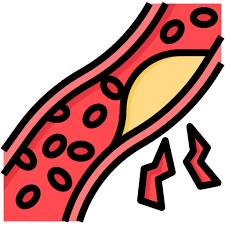

In the fourth step, we'll import the [mean HDL cholesterol data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-mean-hdl-cholesterol-crude) and eliminate columns we don't need. This dataset originates from the World Health Organization and measurements are in mmol/L (millimoles per liter). The table, spanning from 2012 to 2017, segregates mean HDL cholesterol levels by sex. However, our focus will be on the combined mean HDL cholesterol, averaging values across both sexes. Thankfully, the initial data doesn't have any missing values, negating the need for immediate imputation. Yet, after merging this dataset with the heart disease mortality data, 19.37% of the cholesterol records show missing values in the primary frame. To address this, we'll replace each missing entry with the average mean HDL cholesterol for its corresponding year. While this approach successfully removes all missing values, it's essential to recognize the potential for introduced bias.

In [146]:
# Import mean HDL cholesterol data of both sexes
mean_HDL_cholesterol = pd.read_csv("data/cholestrol2012-2017.csv")
mean_HDL_cholesterol = mean_HDL_cholesterol[['Location', 'Period', 'Dim1','FactValueNumeric']]
mean_HDL_cholesterol = mean_HDL_cholesterol.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Cholesterol Level"})
mean_HDL_cholesterol = mean_HDL_cholesterol[mean_HDL_cholesterol["Sex"] == "Both sexes"]
# Sort data frame by country and year and reset index
mean_HDL_cholesterol = mean_HDL_cholesterol.sort_values(by=['Country', 'Year'])
mean_HDL_cholesterol = mean_HDL_cholesterol.reset_index(drop = True)
mean_HDL_cholesterol  = mean_HDL_cholesterol[['Country', 'Year', 'Cholesterol Level']]
# Compute % of missing values in cholesterol data frame before join
percentage_missing_values_cholesterol_before = ((float(mean_HDL_cholesterol['Cholesterol Level'].isna().sum()))/mean_HDL_cholesterol['Cholesterol Level'].count()) * 100.0
print("Percentage of Missing Values for Mean HDL Cholesterol Before Join: ", percentage_missing_values_cholesterol_before)
# Merge cholesteorl data with heart disease mortality data frame, Substituting all NaN values in mean HDL cholesterol col of main dataframe with mean values of corresponding years
heart_disease_death_rates['Mean HDL Cholesterol'] = mean_HDL_cholesterol['Cholesterol Level']
heart_disease_death_rates['Mean HDL Cholesterol'] = heart_disease_death_rates['Mean HDL Cholesterol'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Mean HDL Cholesterol'] == 0.0:
        hdl_cholesterol_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Mean HDL Cholesterol'].dropna()
        hdl_cholesterol_mean = hdl_cholesterol_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Mean HDL Cholesterol'] = hdl_cholesterol_mean
# Compute % of missing values in mean HDL cholesterol after join
percentage_missing_values_cholesterol_after = ((float(heart_disease_death_rates['Mean HDL Cholesterol'].isna().sum()))/heart_disease_death_rates['Mean HDL Cholesterol'].count()) * 100.0
print("Percentage of Missing Values in Cholesterol Level After Join: ", percentage_missing_values_cholesterol_after)
# Outputting heart disease death rates df with mean HDL cholesterol column
heart_disease_death_rates

Percentage of Missing Values for Mean HDL Cholesterol Before Join:  0.0
Percentage of Missing Values in Cholesterol Level After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000
...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152


### **Add low physical activity DALYs data**
<img src="https://cdn-icons-png.flaticon.com/512/5783/5783140.png" alt="Alt Text" width="300" height="200">
For our fifth step, we'll import the [low physical activity DALYs data](https://ourworldindata.org/grapher/disease-burden-by-risk-factor) data and discard columns we won't be utilizing. This data is sourced from the World Health Organization. Spanning from 2012 to 2017, the table breaks down 'low physical activity' data by sex. We'll focus exclusively on the combined data for both sexes, which is a calculated average of the two. Fortunately, there are no missing values in the 'low physical activity DALYs' data prior to the merge, eliminating the need for imputation at this stage. Furthermore, after integrating this data with the heart disease mortality dataset, the 'low physical activity' column in the main frame remains complete, with no missing values. Thus, we can proceed without further imputation, but we should be aware of potential biases that may still be present.

In [147]:
# Import low physical activity DALYs data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
low_phys_activity = pd.read_csv("data/disease-burden-by-risk-factor.csv")
low_phys_activity = low_phys_activity[['Entity', 'Year', 'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)']]
low_phys_activity = low_phys_activity.loc[low_phys_activity['Year'].isin([2012,2013,2014,2015,2016,2017])]
low_phys_activity = low_phys_activity.rename(columns = {"Entity": "Country",  "DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)": "Low Physical Activity DALYs"})
# Sort low physical activity DALYs data by country and year and reset indexes and choose only country, year, and low physical activity DALYs columns
low_phys_activity = low_phys_activity.sort_values(by=['Country', 'Year'])
low_phys_activity.insert(2, 'Sex', 'Both sexes')
low_phys_activity = low_phys_activity.reset_index(drop = True)
low_phys_activity = low_phys_activity[['Country', 'Year', 'Low Physical Activity DALYs']]
# Compute % of missing values in low physical activity data frame before join
percentage_missing_values_low_physical_activity_before = ((float(low_phys_activity['Low Physical Activity DALYs'].isna().sum()))/low_phys_activity['Low Physical Activity DALYs'].count()) * 100.0
print("Percentage of Missing Values for Low Physical Activity DALYs Before Join: ", percentage_missing_values_cholesterol_before)
# Merge low physical activity DALY data with heart disease mortality data frame and compute % of missing values in low physical activity after join with main dataframe (no imputation required since 0% values missing after join)
heart_disease_death_rates['Low Physical Activity DALYs'] = low_phys_activity['Low Physical Activity DALYs']
percentage_missing_values_low_physical_activity_after = ((float(heart_disease_death_rates['Low Physical Activity DALYs'].isna().sum()))/heart_disease_death_rates['Low Physical Activity DALYs'].count()) * 100.0
print("Percentage of Missing Values in Low Physical Activity DALYs Level After Join: ", percentage_missing_values_low_physical_activity_after)
# Outputting heart disease death rates data frame after 
heart_disease_death_rates

Percentage of Missing Values for Low Physical Activity DALYs Before Join:  0.0
Percentage of Missing Values in Low Physical Activity DALYs Level After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82
...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67


### **Add spirits consumption data**
<img src="https://icon2.cleanpng.com/20180525/saz/kisspng-kerala-management-aptitude-test-kmat-feb-2018-alcohol-icon-5b08d908a90300.8810154215273065046923.jpg" alt="Alt Text" width="300" height="200">
In the sixth step, we'll be importing the  [spirits consumption data](https://ourworldindata.org/grapher/spirits-consumption-per-person) related to alcohol consumption and discarding unnecessary columns. This dataset is procured from Our World in Data. The table, covering data from 2012 to 2017, presents spirits consumption rates for both sexes combined. Before merging, the 'spirits consumption' data is complete, eliminating the need for preliminary imputation. However, post-merger with the heart disease mortality dataset, we observe that 21.28% of entries in the 'spirits consumption' column are missing. To rectify this, we'll replace each missing entry with the corresponding year's average spirits consumption. With this approach, we address all missing values, but it's important to acknowledge the potential for bias introduction.



In [148]:
# Import spirits consumption data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
spirits_consumption = pd.read_csv("data/spirits-consumption-per-person.csv")
spirits_consumption = spirits_consumption[['Entity', 'Year', 'Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits']]
spirits_consumption = spirits_consumption.loc[spirits_consumption['Year'].isin([2012,2013,2014,2015,2016,2017])]
# Sort spirits consumption data by country and year and reset indexes and choose only country, and spirits consumption columns
spirits_consumption = spirits_consumption.rename(columns = {"Entity": "Country",  "Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits": "Spirits Consumption"})
spirits_consumption = spirits_consumption.sort_values(by=['Country', 'Year'])
spirits_consumption.insert(2, 'Sex', 'Both sexes')
spirits_consumption = spirits_consumption.reset_index(drop = True)
spirits_consumption = spirits_consumption[['Country', 'Year', 'Spirits Consumption']]
# Compute % of missing values in spirits consumption data frame before join
percentage_missing_values_spirits_consumption_before = ((float(spirits_consumption['Spirits Consumption'].isna().sum()))/spirits_consumption['Spirits Consumption'].count()) * 100.0
print("Percentage of Missing Values for Spirits Consumption Before Join: ", percentage_missing_values_spirits_consumption_before)
# Merge spirits consumption data with heart disease mortality data frame, Substituting all NaN values in spirits consumption column of main dataframe with mean values of corresponding years
heart_disease_death_rates['Spirits Consumption'] = spirits_consumption['Spirits Consumption']
heart_disease_death_rates['Spirits Consumption'] = heart_disease_death_rates['Spirits Consumption'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Spirits Consumption'] == 0.0:
        spirits_consumption_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Spirits Consumption'].dropna()
        spirits_consumption_mean = spirits_consumption_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Spirits Consumption'] = spirits_consumption_mean
# Compute % of missing values in spirits consumption after join
percentage_missing_values_spirits_consumption_after = ((float(heart_disease_death_rates['Spirits Consumption'].isna().sum()))/heart_disease_death_rates['Spirits Consumption'].count()) * 100.0
print("Percentage of Missing Values for Spirits Consumption After Join: ", percentage_missing_values_spirits_consumption_after)
heart_disease_death_rates

Percentage of Missing Values for Spirits Consumption Before Join:  0.0
Percentage of Missing Values for Spirits Consumption After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000
...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531


### **Add smoking death percentage data**
<img src="https://static.thenounproject.com/png/479658-200.png" alt="Alt Text" width="300" height="200">
The seventh step we will take is to import the [smoking death percentage data](https://ourworldindata.org/grapher/share-deaths-smoking), which is an age-standardized estimate (share of smoking deaths), and remove the columns we aren't going to use. This feature data comes from Our World in Data. The smoking death percentage (for each country's population) table includes data from 2012-2017 that has smoking death percentages for both sexes combined. There are no missing values in the smoking death percentage data before joining, so no initial imputation is required. After merging the smoking death percentage data with the heart disease mortality data frame, we can see that there are no missing values in the smoking death percentage column of the main data frame. Thus, no further imputation is required. We must remember to account for potential bias though.

In [149]:
# Import smoking death percentage data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
share_deaths_smoking = pd.read_csv("data/share-deaths-smoking.csv")
share_deaths_smoking = share_deaths_smoking[['Entity', 'Year', 'Deaths - Cause: All causes - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)']]
share_deaths_smoking = share_deaths_smoking.loc[share_deaths_smoking['Year'].isin([2012,2013,2014,2015,2016,2017])]
# Sort spirits consumption data by country and year and reset indexes and choose only country, and spirits consumption columns
share_deaths_smoking = share_deaths_smoking.rename(columns = {"Entity": "Country",  "Deaths - Cause: All causes - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)": "Smoking Death Percentage"})
share_deaths_smoking = share_deaths_smoking.sort_values(by=['Country', 'Year'])
share_deaths_smoking.insert(2, 'Sex', 'Both sexes')
share_deaths_smoking = share_deaths_smoking.reset_index(drop = True)
share_deaths_smoking = share_deaths_smoking[['Country', 'Year', "Smoking Death Percentage"]]
# Compute % of missing values in smoking deaths consumption data frame before join
percentage_missing_values_smoking_deaths_before = ((float(share_deaths_smoking["Smoking Death Percentage"].isna().sum()))/share_deaths_smoking["Smoking Death Percentage"].count()) * 100.0
print("Percentage of Missing Values for Share of Smoking Deaths Before Join: ", percentage_missing_values_smoking_deaths_before)
# Merge smoking death data with heart disease mortality data frame, Substituting all NaN values in smoking death percentage column of main dataframe with mean values of corresponding years
heart_disease_death_rates["Smoking Death Percentage"] = share_deaths_smoking["Smoking Death Percentage"]
# Compute % of missing values in smoking death percentage column after join
percentage_missing_values_smoking_deaths_after = ((float(heart_disease_death_rates["Smoking Death Percentage"].isna().sum()))/heart_disease_death_rates["Smoking Death Percentage"].count()) * 100.0
print("Percentage of Missing Values for Share of Smoking Deaths After Join: ", percentage_missing_values_smoking_deaths_after)
heart_disease_death_rates

Percentage of Missing Values for Share of Smoking Deaths Before Join:  0.0
Percentage of Missing Values for Share of Smoking Deaths After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58
...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06


### **Add raised blood pressure data**
<img src="https://media.istockphoto.com/id/1250234327/vector/blood-pressure-icon-heart-and-sphygmomanometer.jpg?s=612x612&w=0&k=20&c=_55Tpa8ciPedUD4br7xy8sv1jIWUplT6Wgr6bqDcPVs=" alt="Alt Text" width="300" height="200">
In our eighth step, we'll import the [raised blood pressure data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/raised-blood-pressure-(sbp-=140-or-dbp-=90)-(age-standardized-estimate)), an age-standardized estimate representing the percentage of the population with elevated blood pressure. For our purposes, raised blood pressure is defined as a systolic blood pressure (SBP) of 140 or higher or a diastolic blood pressure (DBP) of 90 or higher. We'll then exclude columns not pertinent to our analysis. This dataset is sourced from the World Health Organization. The table, which spans from 2012 to 2015, presents percentages of raised blood pressure for both genders combined. Before merging, 2.09% of the entries in this data are missing, necessitating an initial imputation: each missing value will be replaced with the year's average blood pressure percentage. Post-merger, all NaN values for the years 2012-2015 will be filled with the respective yearly average, while those for 2016-2017 will be replaced with the corresponding country's mean. This ensures the 'raised blood pressure' column in the consolidated data frame has no missing entries. As we proceed, it's essential to be vigilant of potential biases in our dataset.



In [280]:
# Import raised blood pressure data, select and rename relevant columns, and choose all rows that have both sexes. Will have to fill in missing 2016 and 2017 data later.
blood_pressure = pd.read_csv('data/bld pressure.csv')
blood_pressure = blood_pressure[['Location', 'Period', 'Dim1','Dim2', 'FactValueNumeric']]
blood_pressure = blood_pressure.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Raised Blood Pressure Percentage"})
# # Sort raised blood pressure data by country and year and reset indexes and choose only country, year, and raised blood pressure percentage columns
blood_pressure = blood_pressure.sort_values(by=['Country', 'Year'])
blood_pressure = blood_pressure[blood_pressure['Sex'] == "Both sexes"]
blood_pressure = blood_pressure[['Country', 'Year', 'Raised Blood Pressure Percentage']]
blood_pressure = blood_pressure.reset_index(drop = True)
# Compute % of missing values in smoking deaths consumption data frame before join
percentage_missing_values_raised_blood_pressure_before = ((float(blood_pressure["Raised Blood Pressure Percentage"].isna().sum()))/blood_pressure["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and Initial Imputation: ", percentage_missing_values_raised_blood_pressure_before)
# Fill all missing values inside the original blood pressure data frame with the average blood pressure of that year and confirm no more missing values in blood pressure data frame after initial imputation
blood_pressure['Raised Blood Pressure Percentage'] = blood_pressure['Raised Blood Pressure Percentage'].fillna(0.0)
for index, row in blood_pressure.iterrows():
    if row['Raised Blood Pressure Percentage'] == 0.0:
        current_year_bp_rows = blood_pressure[blood_pressure['Year'] == row['Year']]
        blood_pressure_mean  = current_year_bp_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
        blood_pressure.loc[index, 'Raised Blood Pressure Percentage'] = blood_pressure_mean
percentage_missing_values_raised_blood_pressure_before_2 = ((float(blood_pressure["Raised Blood Pressure Percentage"].isna().sum()))/blood_pressure["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and After Initial Imputation: ", percentage_missing_values_raised_blood_pressure_before_2)
# Merge raised blood pressure data with heart disease mortality data frame, substitute all NaN blood pressure values for 2012-2015 with 0.0 and eventually mean blood pressure of that particular year
heart_disease_death_rates["Raised Blood Pressure Percentage"] = blood_pressure["Raised Blood Pressure Percentage"]
heart_disease_death_rates["Raised Blood Pressure Percentage"] = heart_disease_death_rates["Raised Blood Pressure Percentage"].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Year'] < 2016 and row['Raised Blood Pressure Percentage'] == 0.0:
        current_year_bp_rows2 = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]
        blood_pressure_mean2  = current_year_bp_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Raised Blood Pressure Percentage'] = blood_pressure_mean2


# Substitute all 2016 and 2017 blood pressure values (0.0) with mean raised blood pressure for corresponding countries
for country in heart_disease_death_rates['Country'].unique():
    country_mean_blood_pressure_nonnull_rows = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['Raised Blood Pressure Percentage'] != 0.0)]
    country_mean_blood_pressure_nonnull = country_mean_blood_pressure_nonnull_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
    country_mean_blood_pressure_null_row_indexes = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['Raised Blood Pressure Percentage'] == 0.0)].index
    for i in country_mean_blood_pressure_null_row_indexes:
      heart_disease_death_rates.loc[i, 'Raised Blood Pressure Percentage'] = country_mean_blood_pressure_nonnull  

# Compute % of missing values in smoking death percentage column after join
percentage_missing_values_raised_blood_pressure_after = ((float(heart_disease_death_rates["Raised Blood Pressure Percentage"].isna().sum()))/heart_disease_death_rates["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Main Data Frame After Join and Imputation: ", percentage_missing_values_raised_blood_pressure_after)
heart_disease_death_rates


Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and Initial Imputation:  2.094240837696335
Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and After Initial Imputation:  0.0
Percentage of Missing Values for Raised Blood Pressure in Main Data Frame After Join and Imputation:  0.0


,Country,Year,Anxiety,BMI,Cholesterol,Alcohol,Smoking,Blood Pressure,Healthcare Exp,Overweight,Heart Disease Mortality Rate,Raised Blood Pressure Percentage
0,Afghanistan,2012,0.460098,0.338651,0.375000,0.141140,0.242707,0.870536,0.346736,0.063361,0.508701,30.500000
1,Afghanistan,2013,0.464530,0.345265,0.375000,0.137901,0.247974,0.870536,0.394256,0.071625,0.498590,30.500000
2,Afghanistan,2014,0.468789,0.358492,0.375000,0.000000,0.247974,0.875000,0.431854,0.079890,0.491881,30.600000
3,Afghanistan,2015,0.471569,0.365105,0.375000,0.133309,0.249190,0.875000,0.462141,0.088154,0.488564,30.600000
4,Afghanistan,2016,0.472390,0.371719,0.375000,0.000000,0.250810,0.834821,0.551436,0.097796,0.483462,29.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,0.359238,0.424081,0.461373,0.179645,0.294976,0.593624,0.256924,0.452251,0.238931,24.297181
1364,Zimbabwe,2014,0.360261,0.419397,0.462015,0.168416,0.300243,0.593624,0.262536,0.452251,0.238198,24.297181
1365,Zimbabwe,2015,0.360988,0.421819,0.460731,0.166924,0.305916,0.593624,0.265709,0.452251,0.237249,24.297181
1366,Zimbabwe,2016,0.361265,0.419921,0.463940,0.165311,0.310778,0.593624,0.267524,0.452251,0.235435,24.297181


### **Add type 1 and 2 diabetes deaths data**
<img src="https://www.arkanalabs.com/wp-content/uploads/2021/10/diabetes-2048x1544.png" alt="Alt Text" width="300" height="200">
The ninth step we will take is to import the [diabetes deaths data](https://ourworldindata.org/grapher/deaths-from-diabetes-by-type), which contains annual type 1 and 2 diabetes deaths, and remove the columns we aren't going to use. This feature data comes from Our World in Data. The type 1 and 2 diabetes deaths (for each country's population) table includes data from 2012-2017 that has diabetes deaths for all ages and both sexes combined. There are no missing values in the type 1 and 2 diabetes death data before joining, so no initial imputation is required. After merging the diabetes death data with the heart disease mortality data frame, we can see that there are no missing values in the type 1 and 2 diabetes deaths columns of the main data frame. Thus, no further imputation is required. However, we must remember to account for some bias.

In [151]:
# Import type 1 and 2 diabetes deaths dataset into pandas data frame, select and rename columns, and sort them in ascending order by country & year
diabetes_deaths_both_types = pd.read_csv('data/deaths-from-diabetes-by-type.csv')
diabetes_deaths_both_types = diabetes_deaths_both_types[['Entity', 'Year','Deaths - Diabetes mellitus type 1 - Sex: Both - Age: All Ages (Number)', 'Deaths - Diabetes mellitus type 2 - Sex: Both - Age: All Ages (Number)']]
diabetes_deaths_both_types = diabetes_deaths_both_types.rename(columns = {"Entity": "Country", "Deaths - Diabetes mellitus type 1 - Sex: Both - Age: All Ages (Number)":"Type 1 Deaths","Deaths - Diabetes mellitus type 2 - Sex: Both - Age: All Ages (Number)":"Type 2 Deaths"})
diabetes_deaths_both_types = diabetes_deaths_both_types.sort_values(by=['Country', 'Year'])
# Since the source indicated both sexes, and all ages, add columns to indicate that
# create the values we need to add 2 long arrays
both_sexes = np.full(len(diabetes_deaths_both_types), "Both sexes")
all_ages = np.full(len(diabetes_deaths_both_types), "All ages")
# add those values as new columns
diabetes_deaths_both_types['Sex'] = both_sexes
diabetes_deaths_both_types['Age'] = all_ages
# rearrange the order to match the format of previous tables
desired_order = ['Country','Year','Sex','Age','Type 1 Deaths','Type 2 Deaths']
diabetes_deaths_both_types = diabetes_deaths_both_types[desired_order]
# this data is from 1990 - 2019, filter it for only 2012-2017
diabetes_deaths_both_types = diabetes_deaths_both_types[diabetes_deaths_both_types["Year"].between(2012, 2017)]
diabetes_deaths_both_types = diabetes_deaths_both_types.reset_index(drop = True)
diabetes_deaths_both_types = diabetes_deaths_both_types[['Country', 'Year', 'Type 1 Deaths', 'Type 2 Deaths']]
# Check if there are any missing values inside diabetes type 1 and 2 deaths columns of initial data frame before performing join
percentage_missing_values_diabetes_type1_before = ((float(diabetes_deaths_both_types["Type 1 Deaths"].isna().sum()))/diabetes_deaths_both_types["Type 1 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type1_before)
percentage_missing_values_diabetes_type2_before = ((float(diabetes_deaths_both_types["Type 2 Deaths"].isna().sum()))/diabetes_deaths_both_types["Type 2 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 2 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type2_before)
# Perform join and check if there are still any missing values in type 1 and 2 diabetes deaths columns of main data frame
heart_disease_death_rates['Type 1 Deaths'] = diabetes_deaths_both_types['Type 1 Deaths']
heart_disease_death_rates['Type 2 Deaths'] = diabetes_deaths_both_types['Type 2 Deaths']
percentage_missing_values_diabetes_type1_after = ((float(heart_disease_death_rates["Type 1 Deaths"].isna().sum()))/heart_disease_death_rates["Type 1 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Main Dataframe After Join: ", percentage_missing_values_diabetes_type1_after)
percentage_missing_values_diabetes_type2_after = ((float(heart_disease_death_rates["Type 2 Deaths"].isna().sum()))/heart_disease_death_rates["Type 2 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 2 Diabetes Deaths in Main Dataframe After Join: ", percentage_missing_values_diabetes_type2_after)
heart_disease_death_rates


Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Type 2 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Type 1 Diabetes Deaths in Main Dataframe After Join:  0.0
Percentage of Missing Values for Type 2 Diabetes Deaths in Main Dataframe After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146


### **Add health expenditure (% of GDP) data**
<img src="https://www.urban.org/sites/default/files/2019/10/16/gettyimages-1125388526_crop.jpg" alt="Alt Text" width="300" height="200">
For our tenth step, we'll import data on annual [health expenditure data](https://apps.who.int/nha/database/Select/Indicators/en), represented as a percentage of each country's GDP. This information is sourced from the Global Health Expenditure Database available on the WHO website. The specific dataset is generated using these criteria: "Current Health Expenditure (CHE) as % Gross Domestic Product (GDP)" for the indicator, encompassing all 191 countries over the period of 2012-2017, with the expenditure unit set to "% GDP". Before merging, the dataset on health expenditure as a percentage of GDP has no missing values, hence initial imputation is unnecessary. However, once integrated with our heart disease mortality data frame, it becomes apparent that 20.84% of the data in the health expenditure (% of GDP) column is missing. To address this, we'll replace each missing entry with the average health expenditure for the corresponding year. Once these values are filled, no further imputation steps are necessary. Throughout the process, it's crucial to remain vigilant of potential biases present in our data.

In [152]:
# Import health expenditure as % of GDP into pandas data frame, select and rename columns, and sort them in ascending order by country & year with indexes reset
health_expenditure_as_percent_gdp = pd.read_csv('data/health expenditure as percentage of GDP.csv')
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp[['Location', 'Period', 'FactValueNumeric']]
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.rename(columns = {"Location": "Country", "Period": "Year", "FactValueNumeric": "Healthcare Expenditure (% of GDP)"})
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.sort_values(by=['Country', 'Year'])
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.reset_index(drop = True)

# Find # of missing values in health expenditure data frame before join
percentage_missing_values_health_expenditure_before = ((health_expenditure_as_percent_gdp["Healthcare Expenditure (% of GDP)"].isna().sum()))/(health_expenditure_as_percent_gdp["Healthcare Expenditure (% of GDP)"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type1_before)

# Merge health expenditure data with heart disease mortality data frame, Substituting all NaN values in health expenditure column of main dataframe with mean values of corresponding years
heart_disease_death_rates['Healthcare Expenditure (% of GDP)'] = health_expenditure_as_percent_gdp['Healthcare Expenditure (% of GDP)']
heart_disease_death_rates['Healthcare Expenditure (% of GDP)'] = heart_disease_death_rates['Healthcare Expenditure (% of GDP)'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Healthcare Expenditure (% of GDP)'] == 0.0: # Stopping point
        health_expenditure_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Healthcare Expenditure (% of GDP)'].dropna()
        health_expenditure_mean = health_expenditure_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Healthcare Expenditure (% of GDP)'] = health_expenditure_mean

# Check if there are still any missing values in health expenditure (% of GDP) column from main data frame
percentage_missing_values_health_expenditure_after = ((float(heart_disease_death_rates["Healthcare Expenditure (% of GDP)"].isna().sum()))/heart_disease_death_rates["Healthcare Expenditure (% of GDP)"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Main Dataframe After Join and Before Imputation: ", percentage_missing_values_health_expenditure_after)
heart_disease_death_rates



Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Raised Blood Pressure in Main Dataframe After Join and Before Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP)
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090


### **Add % of overweight adults data**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Obesity-waist_circumference.svg/450px-Obesity-waist_circumference.svg.png" alt="Alt Text" width="300" height="200">
The eleventh step we will take is to import the [% of overweight adults data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi-=-30-(age-standardized-estimate)-(-)), which contains annual % of overweight adults (BMI >= 30) as an age-standardized estimate, and remove the columns we aren't going to use. This feature data comes from the WHO. It contains data from 2012=2-17 and we only consider data for both sexes. There are 2.09% missing values in the % of overweight adults data before joining, so some initial imputation is required (fill each null value with the average overweight percentage of that year). After performing this imputation, there are no missing values in the overweight data frame. After merging the diabetes death data with the heart disease mortality data frame, we can see that there are 40.37% missing values in the % of overweight adults column of the main data frame, so we will replace each missing value for 2012-2016 with the average overweight percentage of that year. After this and replacing the 2017 overweight percentage values with the mean for the corresponding country, there are now no missing values and no further imputation is required. However, we must remember some bias might be introduced.

In [153]:
# Import % of overweight adults data, select and rename relevant columns, and choose all rows that have both sexes and sort by year and country in ascending order. 
# Will have to fill in missing 2017 data later.
overweight = pd.read_csv('data/overweight.csv')
overweight = overweight[['Location', 'Period', 'Dim1', 'FactValueNumeric']]
overweight = overweight[overweight['Dim1'] == 'Both sexes']
overweight = overweight[['Location', 'Period', 'FactValueNumeric']]
overweight = overweight.rename(columns = {"Location": "Country", "Period": "Year", "FactValueNumeric": "% of overweight adults"})
overweight = overweight.sort_values(by=['Country', 'Year'])
overweight = overweight.reset_index(drop = True)

# Find # of missing values in overweight data frame before join and initial imputation 
percentage_missing_values_overweight_before = ((overweight["% of overweight adults"].isna().sum()))/(overweight["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight deaths in Initial Dataframe Before Join and Initial Imputation: ", percentage_missing_values_overweight_before)

# Fill all missing values inside the original overweight data frame with the average % of overweight adults of that year and confirm no more missing values in overweight data frame after initial imputation
overweight['% of overweight adults'] = overweight['% of overweight adults'].fillna(0.0)
for index, row in overweight.iterrows():
    if row['% of overweight adults'] == 0.0:
        current_year_overweight_rows = overweight[overweight['Year'] == row['Year']]
        overweight_percentage_mean  = current_year_overweight_rows['% of overweight adults'].mean(axis = 0)
        overweight.loc[index, '% of overweight adults'] = overweight_percentage_mean
percentage_missing_values_overweight_before_2 = ((float(overweight["% of overweight adults"].isna().sum()))/overweight["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight adults in Initial Dataframe Before Join and After Initial Imputation: ", percentage_missing_values_overweight_before_2)

# Merge overweight data with heart disease mortality data frame, substitute all overweight values for 2012-2016 with 0.0 and eventually mean overweight percentage of that particular year
heart_disease_death_rates["% of overweight adults"] = overweight["% of overweight adults"]
heart_disease_death_rates["% of overweight adults"] = heart_disease_death_rates["% of overweight adults"].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Year'] < 2017 and row['% of overweight adults'] == 0.0:
        current_year_overweight_rows2 = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]
        overweight_mean2  = current_year_overweight_rows['% of overweight adults'].mean(axis = 0)
        heart_disease_death_rates.loc[index, '% of overweight adults'] = overweight_mean2

# Substitute 2017 overweight values (0.0) with mean % of overweight adults for corresponding countries
for country in heart_disease_death_rates['Country'].unique():
    country_mean_overweight_nonnull_rows = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['% of overweight adults'] != 0.0)]
    country_mean_overweight_nonnull = country_mean_overweight_nonnull_rows['% of overweight adults'].mean(axis = 0)
    country_overweight_null_row_indexes = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['% of overweight adults'] == 0.0)].index
    for i in country_overweight_null_row_indexes:
      heart_disease_death_rates.loc[i, '% of overweight adults'] = country_mean_overweight_nonnull  

# Check if there are still any missing values in % of overweight adults column from main data frame
percentage_missing_values_overweight_after = ((float(heart_disease_death_rates["% of overweight adults"].isna().sum()))/heart_disease_death_rates["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight adults Main Data Frame After Join and Imputation: ", percentage_missing_values_overweight_after)
heart_disease_death_rates

Percentage of Missing Values for % of overweight deaths in Initial Dataframe Before Join and Initial Imputation:  2.094240837696335
Percentage of Missing Values for % of overweight adults in Initial Dataframe Before Join and After Initial Imputation:  0.0
Percentage of Missing Values for % of overweight adults Main Data Frame After Join and Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP),% of overweight adults
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000,20.500000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000,21.100000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000,21.700000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000,22.300000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097,48.733402
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572,48.733402
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327,48.733402
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090,48.733402


In [154]:
# reorder the columns in the data frame
heart_disease_death_rates = heart_disease_death_rates[['Country', 'Year', '% of population with anxiety disorders', 'Mean BMI', 'Mean HDL Cholesterol', 'Low Physical Activity DALYs', 'Spirits Consumption', 
'Smoking Death Percentage', 'Raised Blood Pressure Percentage', 'Type 1 Deaths', 'Type 2 Deaths', 'Healthcare Expenditure (% of GDP)', '% of overweight adults', 'Heart Disease Mortality Rate (Deaths per 100K people)']]
# print data types of columns
print(heart_disease_death_rates.dtypes)

Country                                                   object
Year                                                       int64
% of population with anxiety disorders                   float64
Mean BMI                                                 float64
Mean HDL Cholesterol                                     float64
Low Physical Activity DALYs                              float64
Spirits Consumption                                      float64
Smoking Death Percentage                                 float64
Raised Blood Pressure Percentage                         float64
Type 1 Deaths                                              int64
Type 2 Deaths                                              int64
Healthcare Expenditure (% of GDP)                        float64
% of overweight adults                                   float64
Heart Disease Mortality Rate (Deaths per 100K people)    float64
dtype: object


Even though we've imported all the necessary data for our input and output features, it's crucial to conduct a final check for any missing values within the columns and ascertain the percentage of missing data. The following code accomplishes this. As per the results, our data frame is free of missing values, eliminating the need for further imputation. With this assurance, we can transition into the visualization and EDA (Exploratory Data Analysis) phase. Nevertheless, it's vital to bear in mind that our model might exhibit bias when estimating heart disease mortality rates.

In [155]:
# Print the number of missing values in each column
print(heart_disease_death_rates.isna().sum())

# Calculate the overall percentage of missing data inside data frame
overall_missing_percentage = heart_disease_death_rates.isna().sum().sum() / (len(heart_disease_death_rates) * (len(heart_disease_death_rates.columns) - 1))
print("\nPercent of Missing Data: " + str(round(overall_missing_percentage * 100, 3)))
heart_disease_death_rates

Country                                                  0
Year                                                     0
% of population with anxiety disorders                   0
Mean BMI                                                 0
Mean HDL Cholesterol                                     0
Low Physical Activity DALYs                              0
Spirits Consumption                                      0
Smoking Death Percentage                                 0
Raised Blood Pressure Percentage                         0
Type 1 Deaths                                            0
Type 2 Deaths                                            0
Healthcare Expenditure (% of GDP)                        0
% of overweight adults                                   0
Heart Disease Mortality Rate (Deaths per 100K people)    0
dtype: int64

Percent of Missing Data: 0.0


,Country,Year,% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP),% of overweight adults,Heart Disease Mortality Rate (Deaths per 100K people)
0,Afghanistan,2012,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000,20.500000,618.45
1,Afghanistan,2013,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000,21.100000,607.69
2,Afghanistan,2014,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000,21.700000,600.55
3,Afghanistan,2015,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000,22.300000,597.02
4,Afghanistan,2016,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000,23.000000,591.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097,48.733402,331.36
1364,Zimbabwe,2014,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572,48.733402,330.58
1365,Zimbabwe,2015,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327,48.733402,329.57
1366,Zimbabwe,2016,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090,48.733402,327.64


## **Data Visualizations and Exploratory Data Analysis**
<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Data_Visualization_Tools.jpg" alt="Alt Text" width="300" height="200">
Despite the inherent bias in our data, stemming from the imputation techniques we employed to address missing data, quantifying this exact bias remains a challenge. This is especially true considering the significant percentage of data that required imputation across various features. Nonetheless, we can glean some understanding of this bias by examining how these features, including the heart disease mortality rate, evolve over time from 2012 to 2017.
To achieve this, we will employ:
Violin plots: These will offer insight into the distributions for each year.
Line graphs: They will depict how the mean and standard deviations of these features have fluctuated over time.
Box plots: These are essential to illustrate data spread and identify any outliers across the years.
Summary statistics: By analyzing these, we can ascertain the most fitting measures of central tendency and spread for our dataset.
The code block below has been crafted to include functions which can be conveniently applied to each feature. This ensures our approach remains both repeatable and modular. One key observation is that, for the 'low physical activity DALYs' and 'type 1 and 2 diabetes deaths' box and violin plots, we've adjusted the y-axis upper limit to 1/10 of its original value and set the lower limit to 0. This alteration was crucial to accurately showcase the distribution shapes. Consequently, it's imperative to note that there may be more upper outliers than what is visibly presented in the plots.

In [156]:
def graph_feature(feature_name):
    # Need this statement for low physical activity DALYs, type 1 and 2 diabetes deaths features because their max values cause the shape of the violin and box plots to not be clear
    if feature_name == 'Low Physical Activity DALYs' or feature_name == 'Type 1 Deaths' or feature_name == 'Type 2 Deaths':
      # Creates violin plot for given feature over time (2012-2017) using seaborn with y max scaled down by half and lower y as min to make shape more visible
      plt.figure(figsize=(10, 6))
      sns.violinplot(x="Year", y=feature_name, data=heart_disease_death_rates)
      plt.title(feature_name + ' Distribution Over Years Violin Plot') 
      plt.ylim(0, heart_disease_death_rates[feature_name].max(axis = 0)/10)
      plt.show()

      # Creates box plot for given feature over time (2012-2017) using seaborn with y max scaled down by 10 and lower y as min to make shape more visible
      plt.figure(figsize=(10, 6))
      sns.boxplot(x="Year", y=feature_name, data=heart_disease_death_rates)
      plt.title(feature_name + ' Distribution Over Years Box Plot')
      plt.ylim(0, heart_disease_death_rates[feature_name].max(axis = 0)/10)
      plt.show()

    else:
      # Creates violin plot for given feature over time (2012-2017) using seaborn
      plt.figure(figsize=(10, 6))
      sns.violinplot(x="Year", y=feature_name, data=heart_disease_death_rates)
      plt.title(feature_name + ' Distribution Over Years Violin Plot') 
      plt.show()

      # Creates box plot for spirits consumption over time (2012-2017) using seaborn
      plt.figure(figsize=(10, 6))
      sns.boxplot(x="Year", y=feature_name, data=heart_disease_death_rates)
      plt.title(feature_name + ' Distribution Over Years Box Plot')
      plt.show()

    # Computing mean feature value and plotting it over time (years from 2012-2017)
    mean_annual_feature_values = []
    years = heart_disease_death_rates['Year'].unique()
    for year in years:
        current_mean_feature_value = heart_disease_death_rates[heart_disease_death_rates['Year'] == year][feature_name].mean(axis = 0)
        mean_annual_feature_values.append(current_mean_feature_value)

    plt.figure(figsize=(10, 6))
    plt.plot(years, mean_annual_feature_values)
    plt.xlabel('Year')
    plt.ylabel('Mean of ' + feature_name)
    plt.title('Mean of ' + feature_name + ' vs Year')
    plt.show()

   # Computing standard deviation of feature value and plotting it over time (years from 2012-2017)
    stddev_annual_feature_values = []
    for year in years:
      current_stddev_feature_value = heart_disease_death_rates[heart_disease_death_rates['Year'] == year][feature_name].std(axis = 0)
      stddev_annual_feature_values.append(current_stddev_feature_value)
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, stddev_annual_feature_values)
    plt.xlabel('Year')
    plt.ylabel('Std Dev of ' + feature_name)
    plt.title('Std Dev of ' + feature_name + ' vs Year')
    plt.show()

    # Computing summary statistics for feature to show measures of central tendency and spread for that feature
    print(heart_disease_death_rates[feature_name].describe())


#### **Analysis of Graphs of Heart Disease Mortality Rate Distribution Over Years**

Below, we have plotted a box and violin plot for the heart disease mortality rate distribution from 2012-2017, two line graphs of mean and standard deviation for heart disease mortality rate from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the heart disease mortality rate distributions are all unimodal, relatively identical, and skewed to the left, which means the distribution is not normal and the mean heart disease mortality rate is greater than the median mortality rate. Furthermore, the left skew in the distribution gradually over time. The box plot also show that there are many upper outliers within the heart disease mortality rate distribution. The line graphs indicate that both the mean and standard deviation of heart disease mortality rate decrease over time (from 2012-2017), which means the spread and center of the heart disease mortality rate data also decreases. For the heart disease mortality rate data overall across all countries from 2012-2017, the mean annual heart disease mortality rate is 295.97 deaths per 100K people with a standard deviation of 146.38 deaths per 100K people and median of 1.32 litres/person. Given all this evidence, the primary conclusion we can draw about the heart disease mortality rate feature is that it decreases over time, meaning that focusing upon mitigating the risk in some features will reduce the heart disease mortality rates for countries in the future. This will be further explored in the upcoming visualizations.

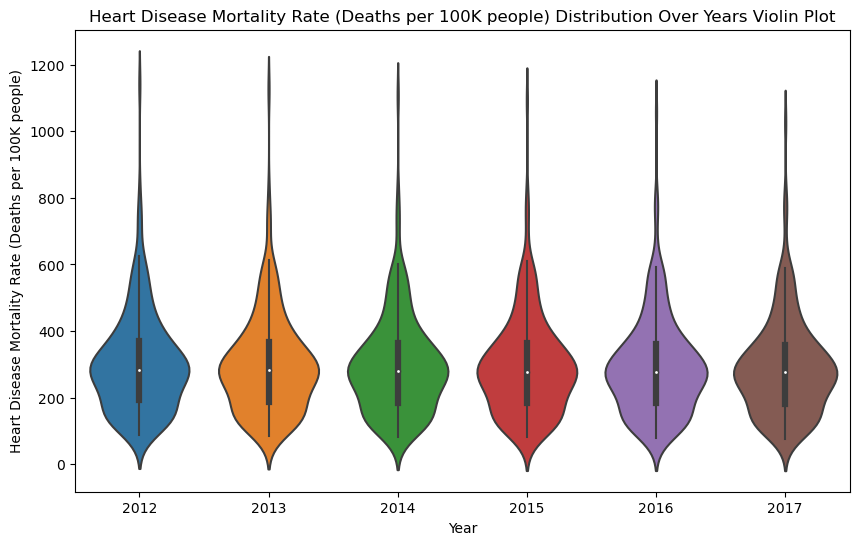

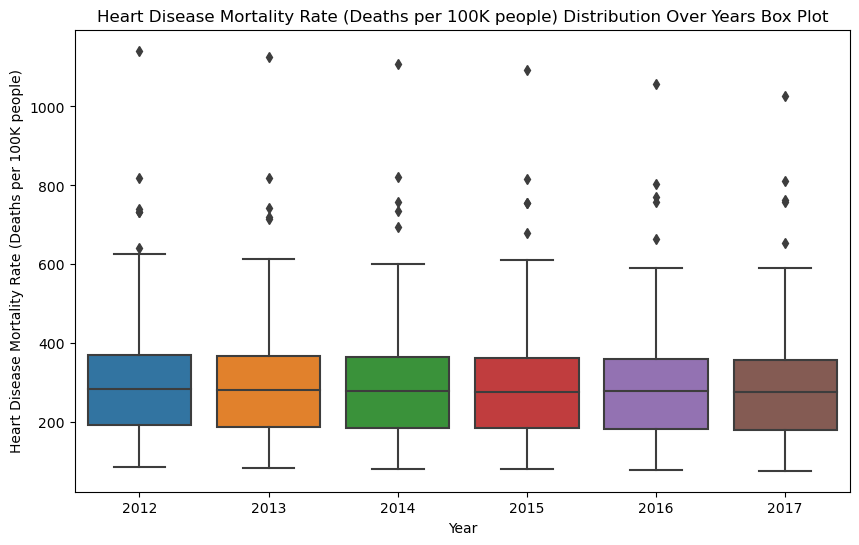

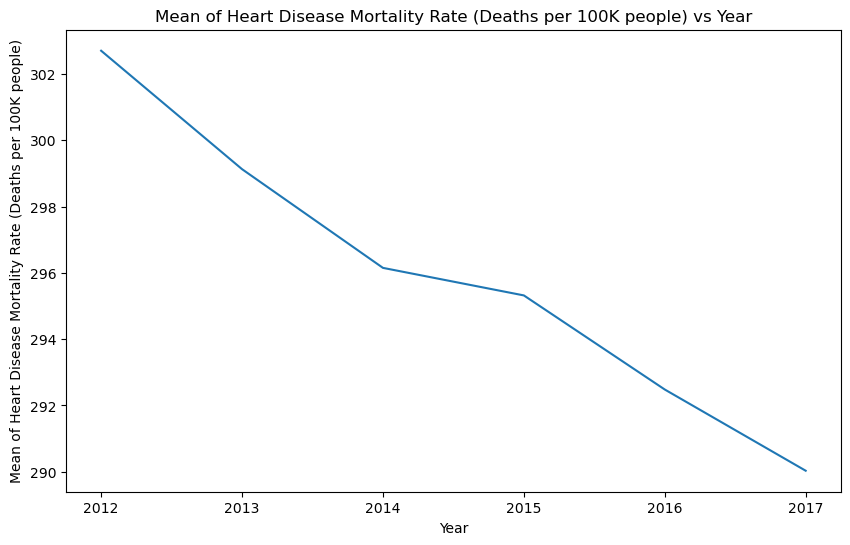

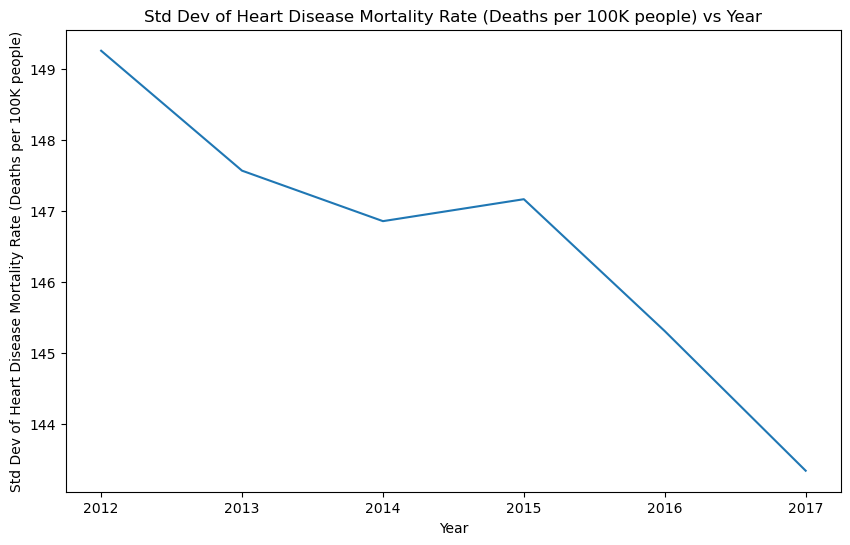

count    1368.000000
mean      295.967683
std       146.380462
min        77.090000
25%       185.072500
50%       279.245000
75%       363.465000
max      1141.290000
Name: Heart Disease Mortality Rate (Deaths per 100K people), dtype: float64


In [157]:
graph_feature('Heart Disease Mortality Rate (Deaths per 100K people)')

#### **Analysis of Graphs of Mean BMI Distribution Over Years**

Below, we have plotted a box and violin plot for the mean BMI distribution per year from 2012-2017, two line graphs of mean and standard deviation for mean BMI from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the mean BMI distributions are all bimodal, relatively identical, and slightly skewed to the left , which means the distribution is mostly normal but the mean BMI in each year is slightly greater than the median BMI. Furthermore, the left skew in the distribution decreases over time. However, the box plot shos that there are no upper or lower outliers within the mean BMI distribution, which gradually decrease over time from 2012-2017. The line graphs indicate that the mean of the mean BMI distribution decreases over time while the std dev of this distribution increases over time (from 2012-2017), which means the spred of the mean BMI data increases while the center decreases. For the mean BMI data overall across all countries from 2012-2017, the mean of the mean BMI distribution is 24.25 kg/m^2 (slightly overweight) with a standard deviation of 3.13 kg/m^2 and median of 24.1 kg/m^2. Given all this evidence, the primary conclusion we can draw about the mean BM Ifeature is that it remains constant over time, making it likely a lower risk but still important factor in heart disease mortality rate predictions.

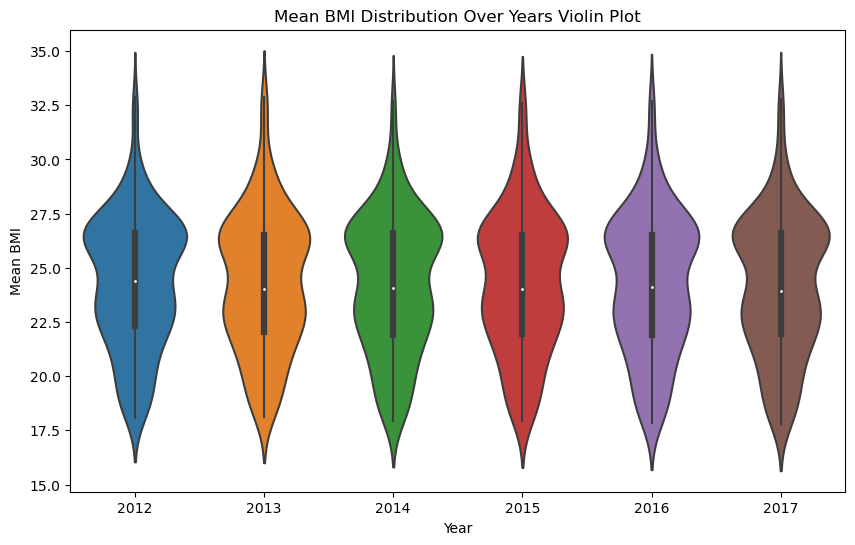

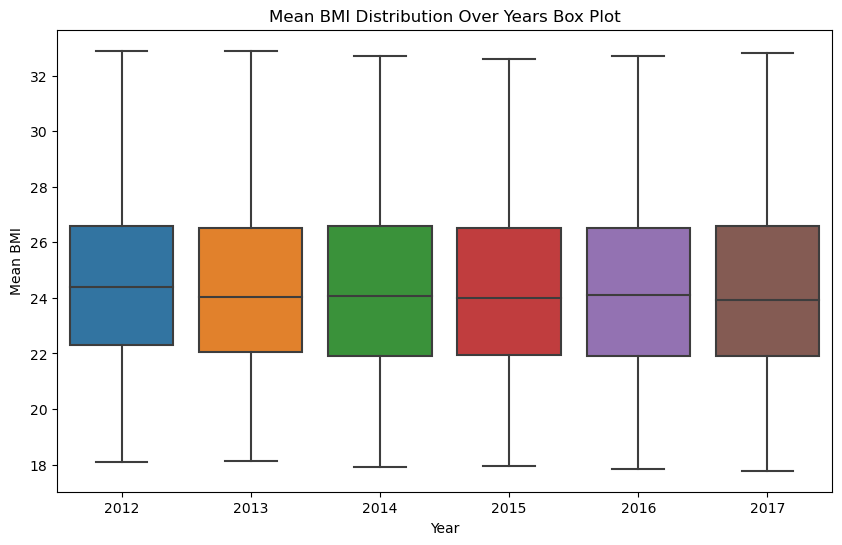

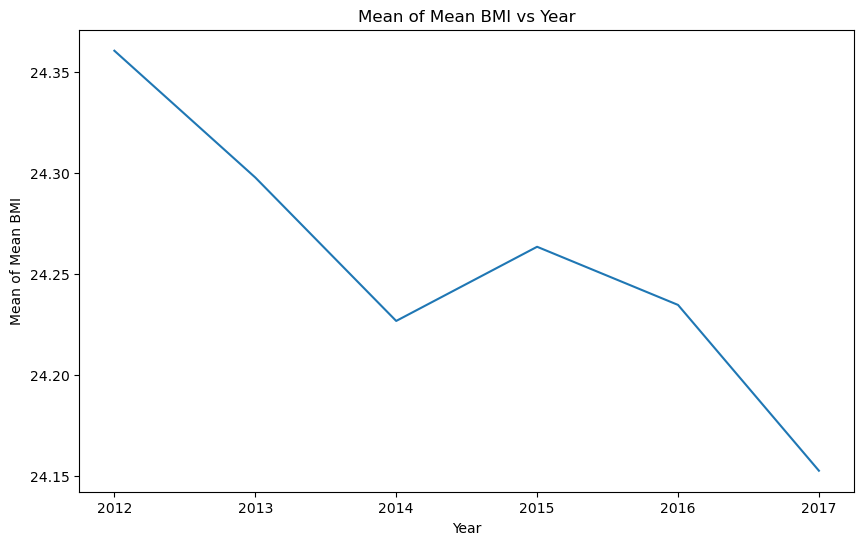

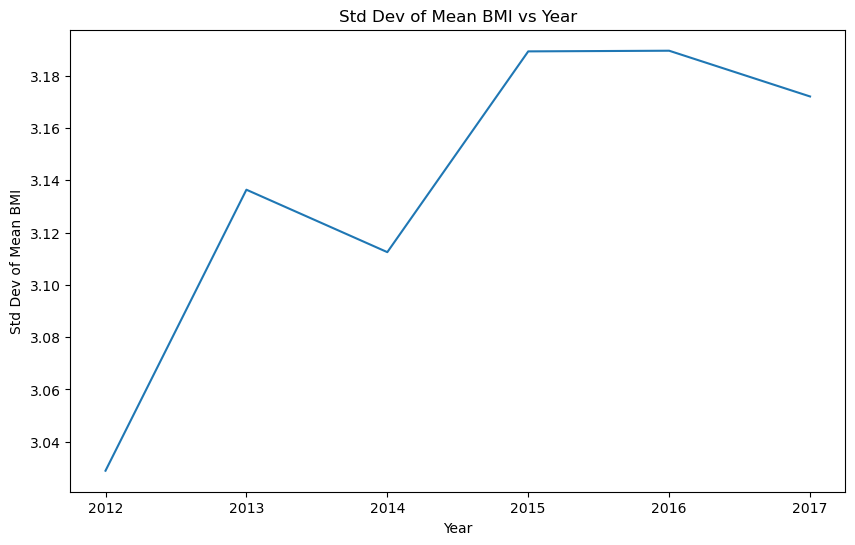

count    1368.000000
mean       24.255990
std         3.133541
min        17.779386
25%        22.000000
50%        24.100000
75%        26.600000
max        32.900000
Name: Mean BMI, dtype: float64


In [158]:
graph_feature('Mean BMI')

#### **Analysis of Graphs of Spirits Consumption Distribution Over Years**

Below, we have plotted a box and violin plot for the sprits consumption per person distribution per year from 2012-2017, two line graphs of mean and standard deviation for spirits consumption from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the spirits consumption distributions are all unimodal, relatively identical, and skewed to the left , which means the distribution is not normal and the mean spirits consumption per person in each year is greater than the median spirits consumption. Furthermore, the left skew in the distribution decreases over time. The box plot also show that there are many upper outliers within the spirits consumption distribution, which gradually decrease over time from 2012-2017. The line graphs indicate that both the mean and standard deviation of spirits consumption decrease over time (from 2012-2017), which means the spread and center of the spirits consumption data also decreases. For the spirits consumption data overall across all countries from 2012-2017, the mean spirits consumption per person is 1.54 litres/person with a standard deviation of 1.37 litres/person and median of 1.32 litres/person. Given all this evidence, the primary conclusion we can draw about the spirits consumption feature is that it decreases over time, making it likely a lower risk factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 

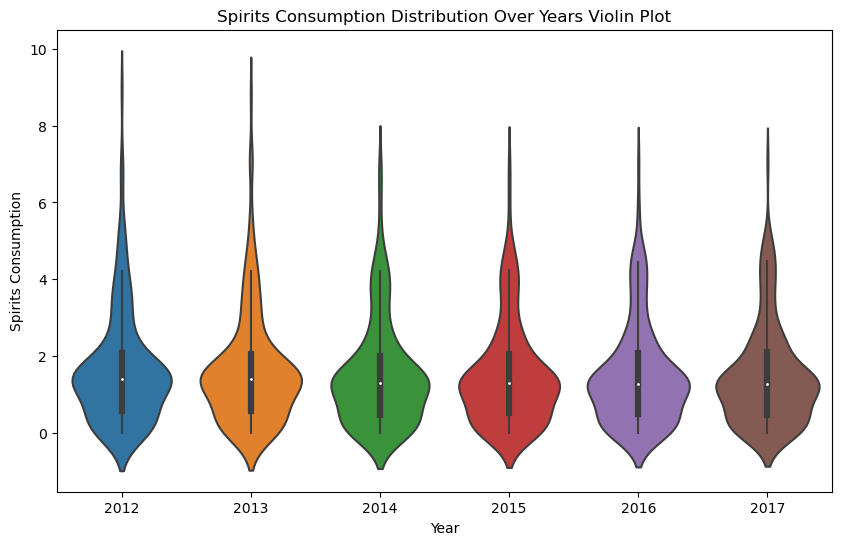

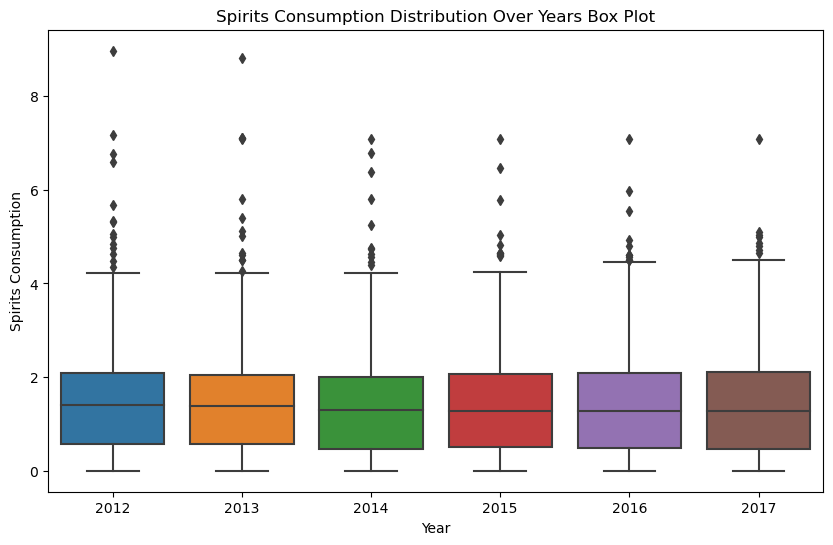

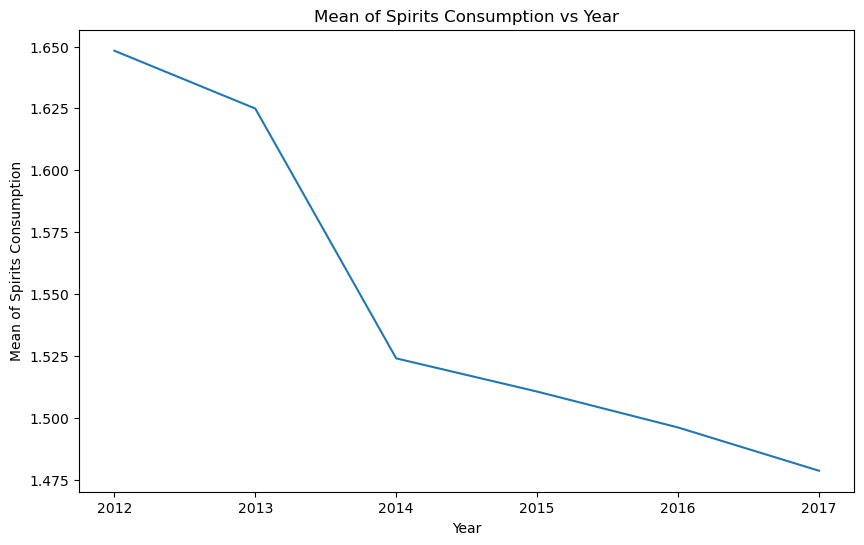

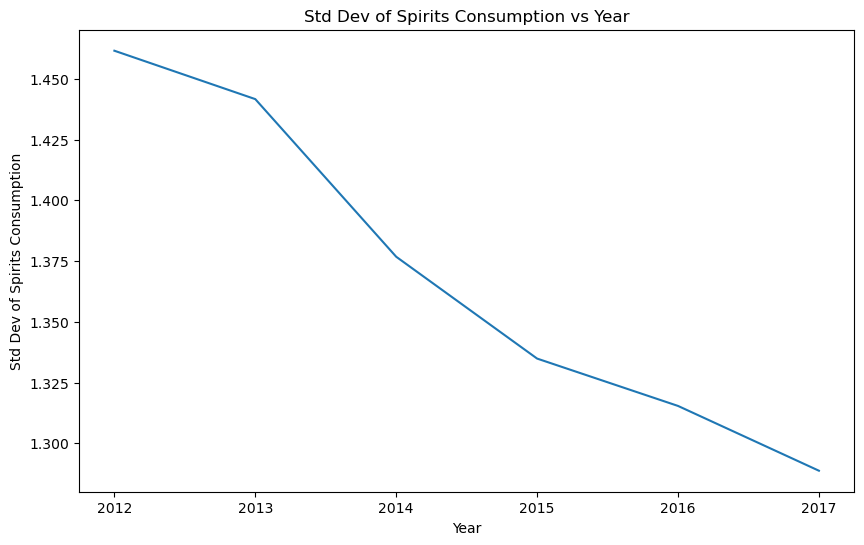

count    1368.000000
mean        1.547069
std         1.370357
min         0.010000
25%         0.517500
50%         1.320000
75%         2.070000
max         8.960000
Name: Spirits Consumption, dtype: float64


In [159]:
graph_feature('Spirits Consumption')

#### **Anaysis of Graphs of Share of Smoking Deaths Percentage Distribution Over Years**

Below, we have plotted a box and violin plot for the smoking death percentage distribution (share of smoking deaths in population) per year from 2012-2017, two line graphs of mean and standard deviation for smoking death percentage from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the smoking death percentages distributions are all bimodal, relatively identical, uniform, and mostly normal, which means the mean and median smoking percentages in each year are extremely close. The box plot also show that there are no upper or lower outliers within the smoking death percentage distributions. The line graphs indicate that both the mean and standard deviation of smoking death percentage decrease over time (from 2012-2017), which means the spread and center of the smoking death percentage data also decreases. For the smoking death percentage data overall across all countries from 2012-2017, the mean smoking percentage is 13.68% with a standard devation of 6.08% and median of 14.84%. Given all this evidence, the primary conclusion we can draw about the spirits consumption feature is that it decreases over time but the distributions remain similar, making it likely a moderate and constant risk factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 

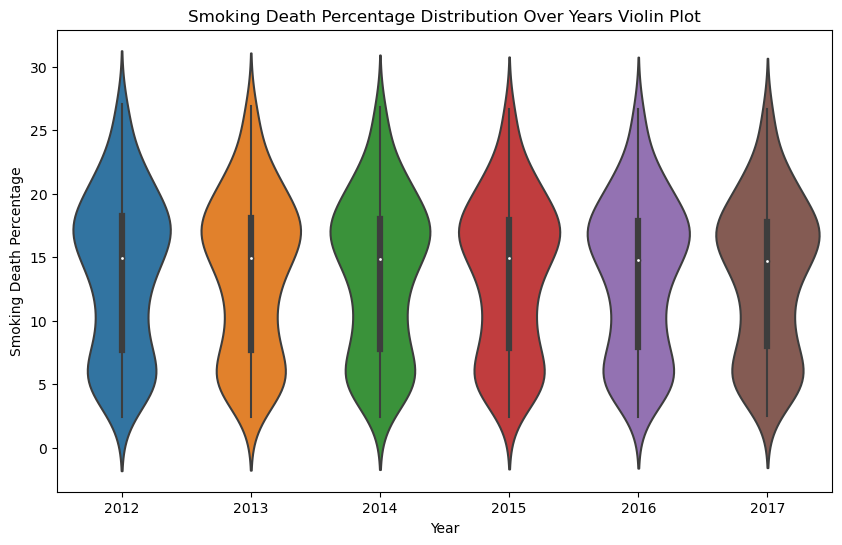

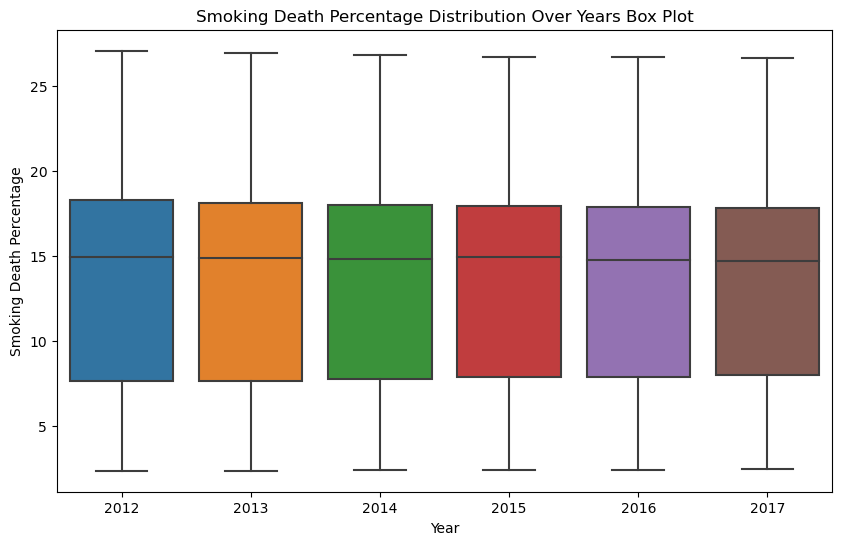

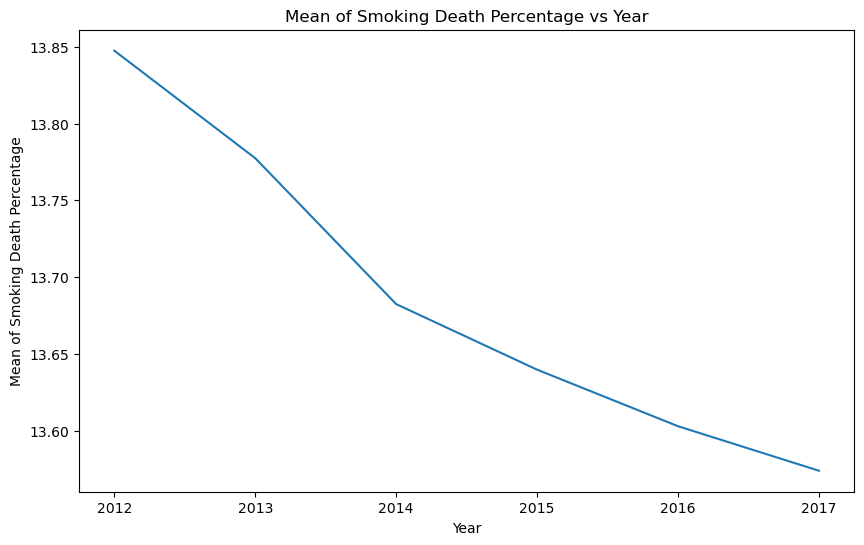

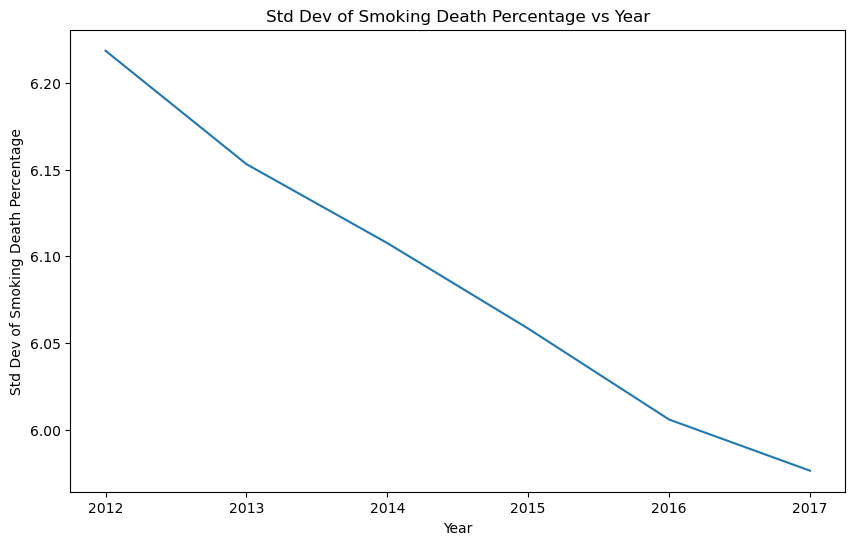

count    1368.000000
mean       13.687251
std         6.076850
min         2.390000
25%         7.665000
50%        14.835000
75%        17.982500
max        27.070000
Name: Smoking Death Percentage, dtype: float64


In [160]:
graph_feature('Smoking Death Percentage')

#### **Analysis of Graphs of % of overweight adults Distribution Over Years**

Below, we have plotted a box and violin plot for the % of overweight adults per year distribution from 2012-2017, two line graphs of mean and standard deviation for % of overweight adults from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the % of overweight adults distributions are all unimodal, relatively identical, and normal, which means the mean % of overweight adults in each year is approximately equal to the median percentage. The box plot also show that there are upper and lower outliers within the % of overweight adults distributions primarily in 2012, 2014, and 2016. The line graphs indicate that both the mean and standard deviation of % of overweight adults fluctuate over time (from 2012-2017), which means the spread and center of the % of overweight adults data don't have a consistent trend. For the % of overweight adults data overall across all countries from 2012-2017, the mean % of overweight adults is 48.1% with a standard devation of 14.3% and median of 48.7%. Given all this evidence, the primary conclusion we can draw about the spirits consumption feature is that it remains constant with similar distributions, making it likely an important risk factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 



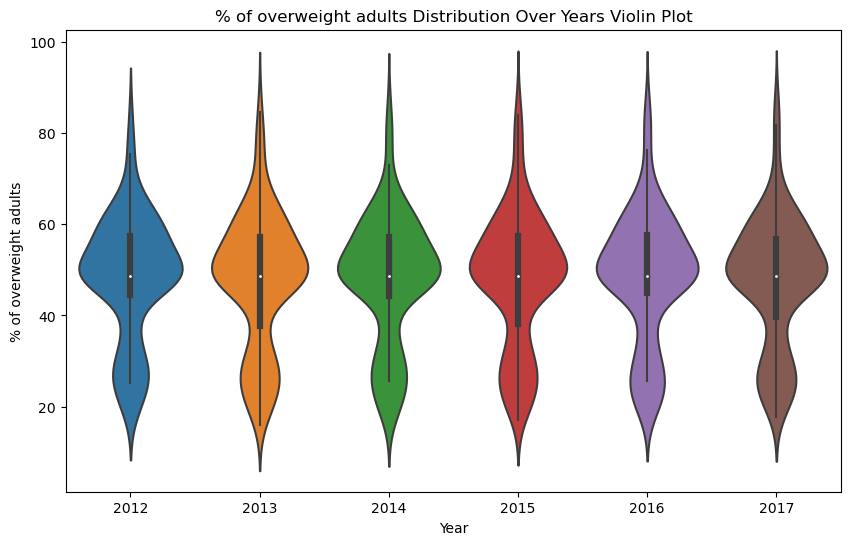

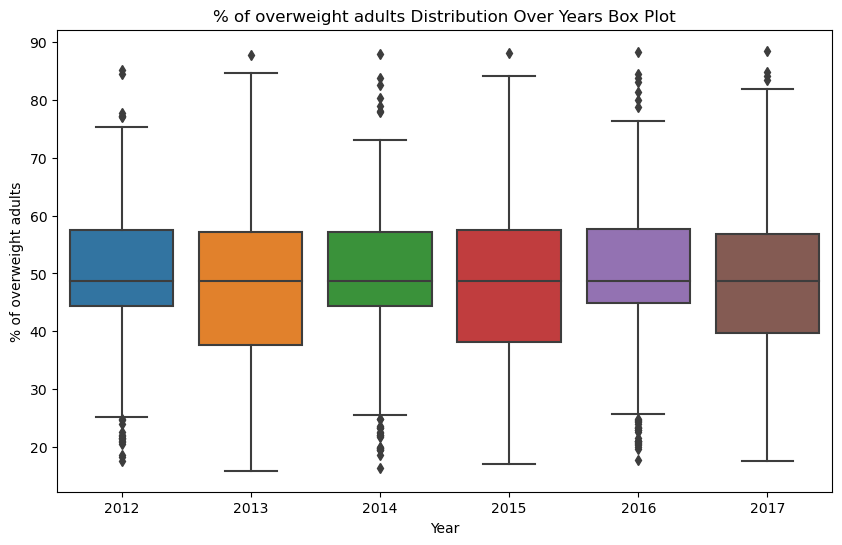

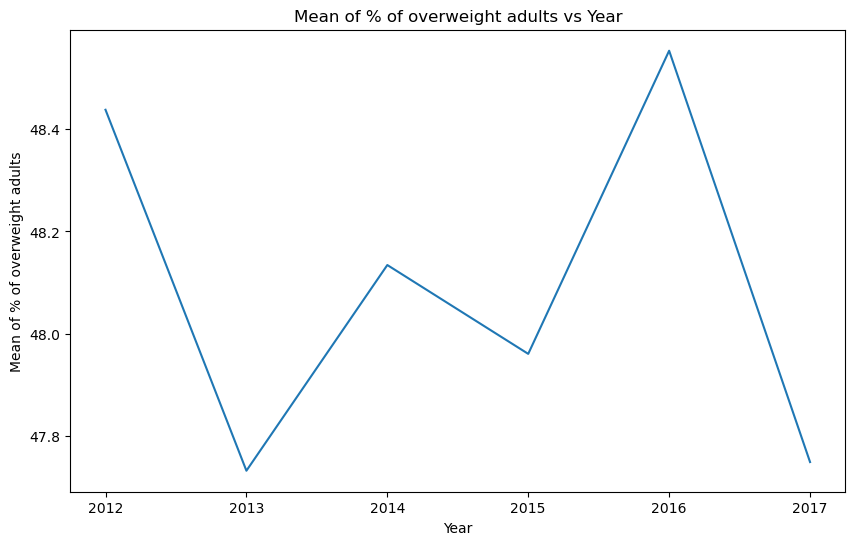

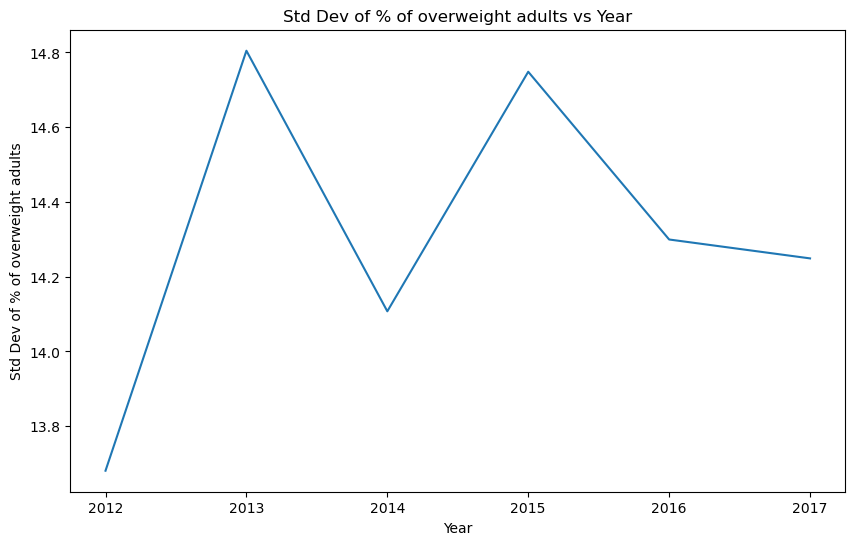

count    1368.000000
mean       48.094786
std        14.297347
min        15.900000
25%        41.050000
50%        48.733402
75%        57.325000
max        88.500000
Name: % of overweight adults, dtype: float64


In [161]:
graph_feature('% of overweight adults')

#### **Analysis of Graphs of Anxiety Disorder Prevalence Distribution Over Years**

Below, we have plotted a box and violin plot for the % of population with anxiety disorders distribution (anxiety disorder prevalence) per year from 2012-2017, two line graphs of mean and standard deviation for % of population with anxiety disorders from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the % of population with anxiety disorder distributions are all unimodal, relatively identical, uniform, and mostly normal, which means the mean and median smoking percentages in each year are extremely close. The box plot also show that there are mainly upper outliers within the % of population with anxiety disorders distributions. The line graphs indicate that the mean of anxiety disorder prevalence increases while the standard deviation decreases over time (from 2012-2017), which means the center of the anxiety disorder prevalence distribution increases while the spread decreases. For the % of population with anxiety disorders data overall across all countries from 2012-2017, the mean anxiety disorder prevalence is 4.14% with a standard devation of 1.04% and median of 4%. Given all this evidence, the primary conclusion we can draw about the % of population with anxiety disorders feature is that it increases with similar distributions, making it likely a major and constant risk factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 

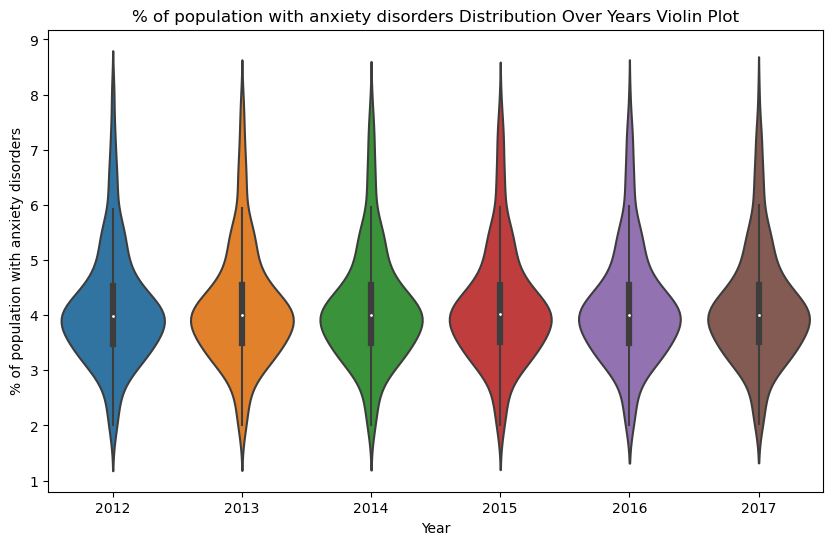

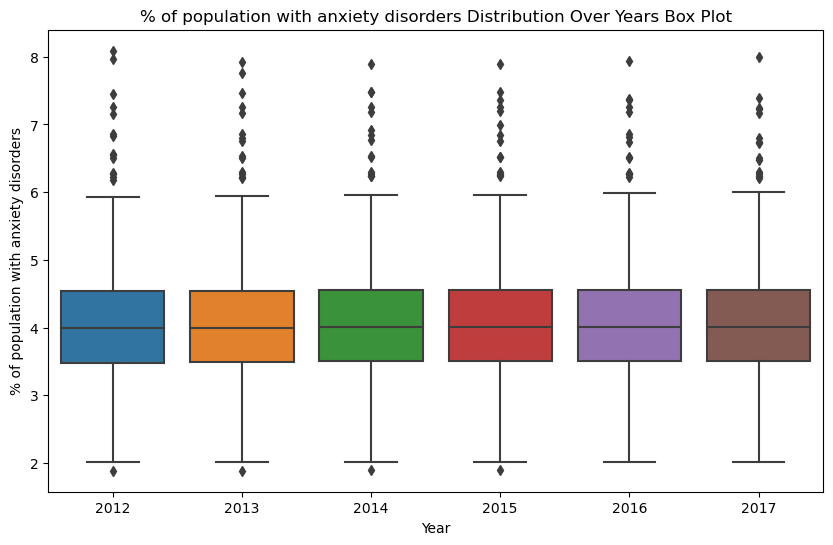

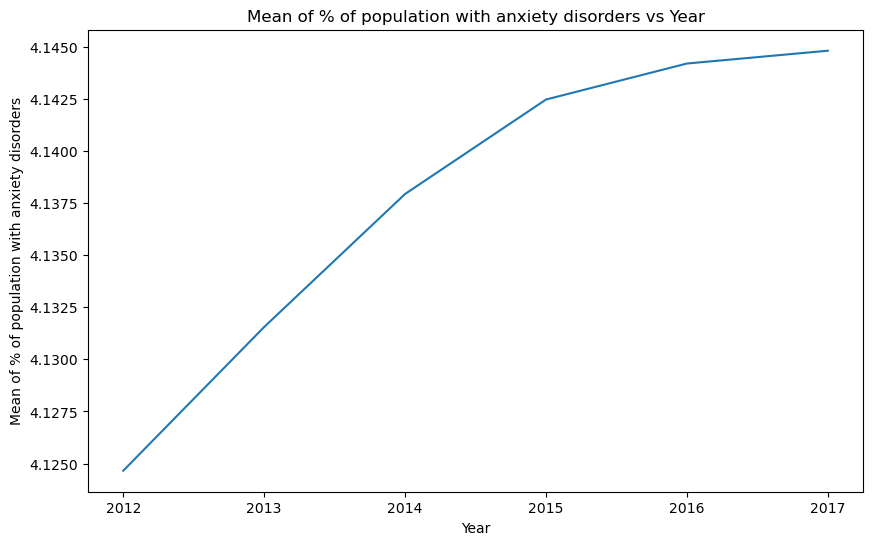

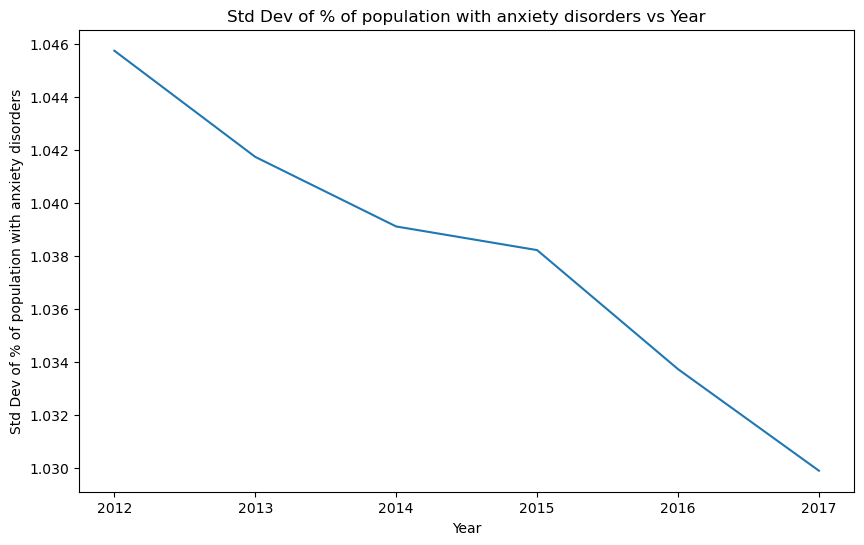

count    1368.000000
mean        4.137595
std         1.036205
min         1.884744
25%         3.495483
50%         4.001340
75%         4.546199
max         8.088891
Name: % of population with anxiety disorders, dtype: float64


In [162]:
graph_feature('% of population with anxiety disorders')

#### **Analysis of Graphs of Mean HDL Cholesterol Distribution Over Years**

Below, we have plotted a box and violin plot for the mean HDL cholesterol distribution from 2012-2017, two line graphs of mean and standard deviation for mean HDL cholesterol from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the mean HDL cholesterol distributions are all unimodal, relatively identical, uniform, and mostly normal, which means the mean and median smoking percentages in each year are extremely close. The box plot also show that there are barely any upper or lower outliers within the mean HDL cholesterol distributions. The line graphs indicate that both the mean of average HDL cholesterol fluctuates over time while the standard deviation increases (from 2012-2017), which means the center of the average HDL cholesterol is fluctuating while the spread increases. For the mean HDL cholsterol data overall across all countries from 2012-2017, the mean of average HDL cholesterol is 1.175 mmol/L with a standard devation of 0.156 mmol/L and median of 1.1 mmol/L. Given all this evidence, the primary conclusion we can draw about the mean HDL cholesterol feature is that it generally decreases with similar distributions, making it likely a moderate and changing risk factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 

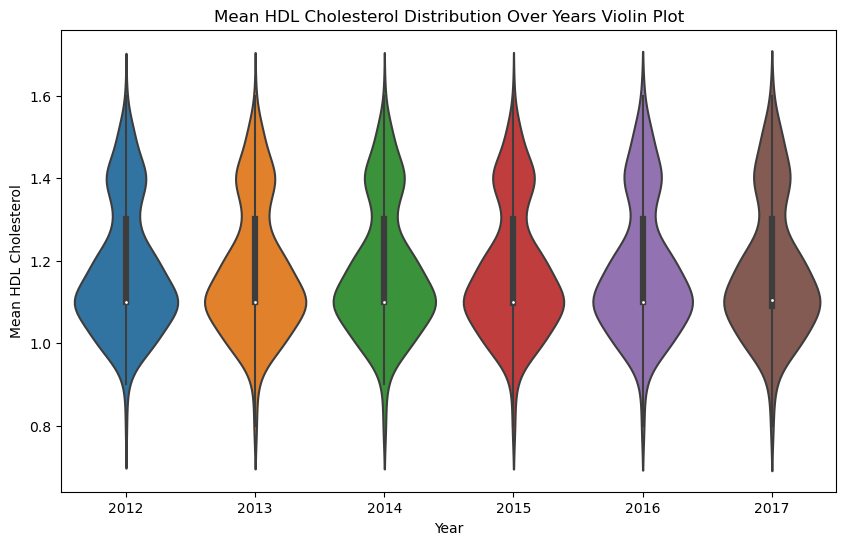

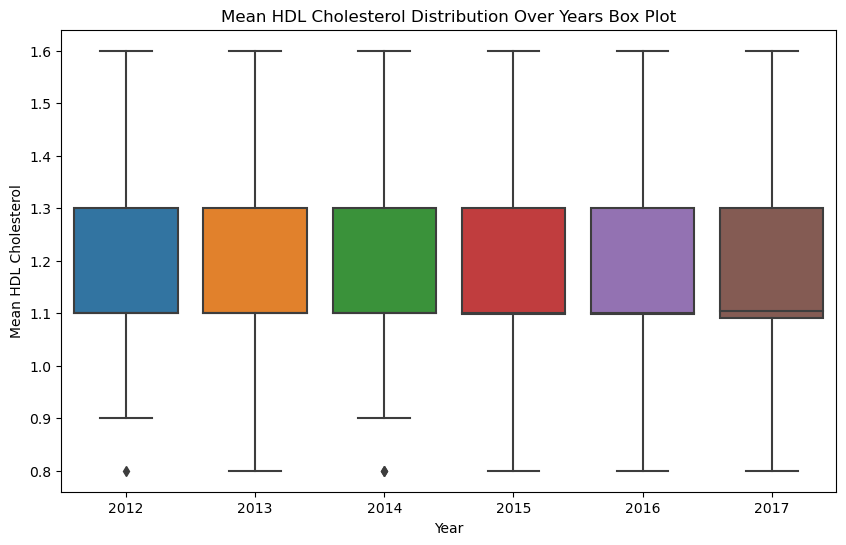

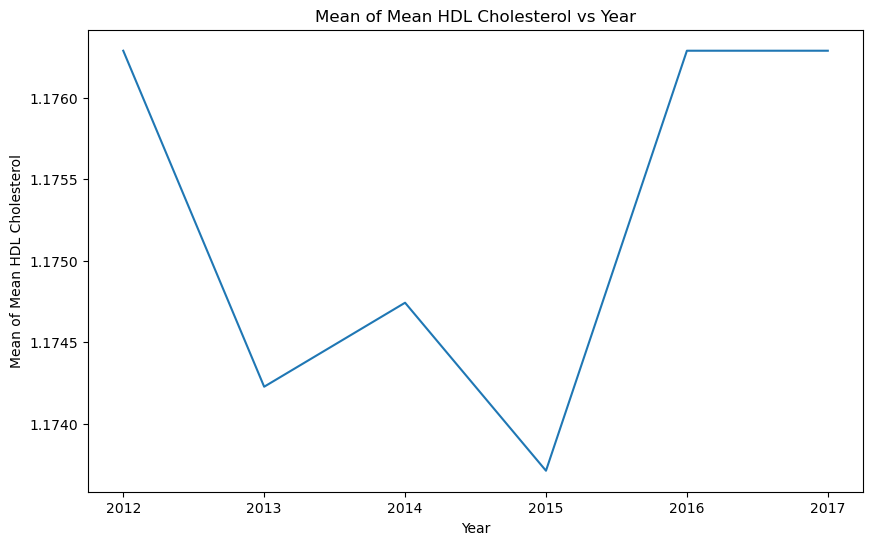

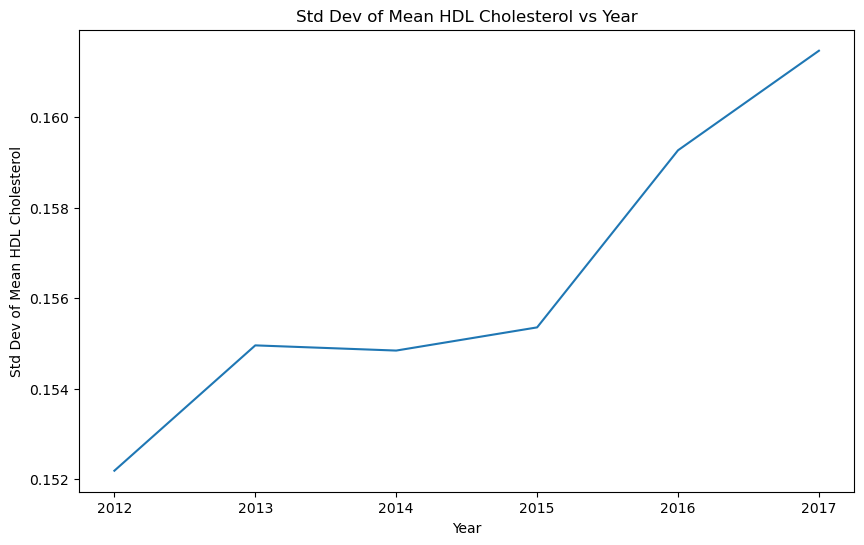

count    1368.000000
mean        1.175257
std         0.156093
min         0.800000
25%         1.100000
50%         1.100000
75%         1.300000
max         1.600000
Name: Mean HDL Cholesterol, dtype: float64


In [163]:
graph_feature('Mean HDL Cholesterol')

#### **Analysis of Graphs of Low Physical Activity DALYs Distribution Over Years**

For the low physical activity DALYs violin and box plots, we had to adjust the y-axis range to get a better view of the structure of the main plot due to the high max values, which means many of the upper outliers aren't included here.

Below, we have plotted a box and violin plot for the low physical activity DALYs distribution from 2012-2017, two line graphs of mean and standard deviation for low physical activity DALYs from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the low physical activity DALYs distributions are all unimodal, relatively identical, and extremely skewed to the left, which means the mean low physical activity DALYs in each year is considerably greater than the median. The box plot also show that there is a major number of upper outliers within the low physical activity DALYs distributions. The line graphs indicate that both the mean and standard deviation of low physical activity DALYs increase (from 2012-2017), which means the center and spread of the low physical activity DALYs increase. For the low physical activity DALYs data overall across all countries from 2012-2017, the mean of low physical activity DALYs is 370000 with a standard devation of 1380000 and median of 13000. Given all this evidence, the primary conclusion we can draw about the low physical activity DALYs feature is that it generally increases with similar distributions, making it likely a high risk factor in heart disease mortality rate predictions. However, one thing to note is that due to the high bias within it, it may not be the most reliable feature for the actual analysis, hypothesis testing, and ML. 

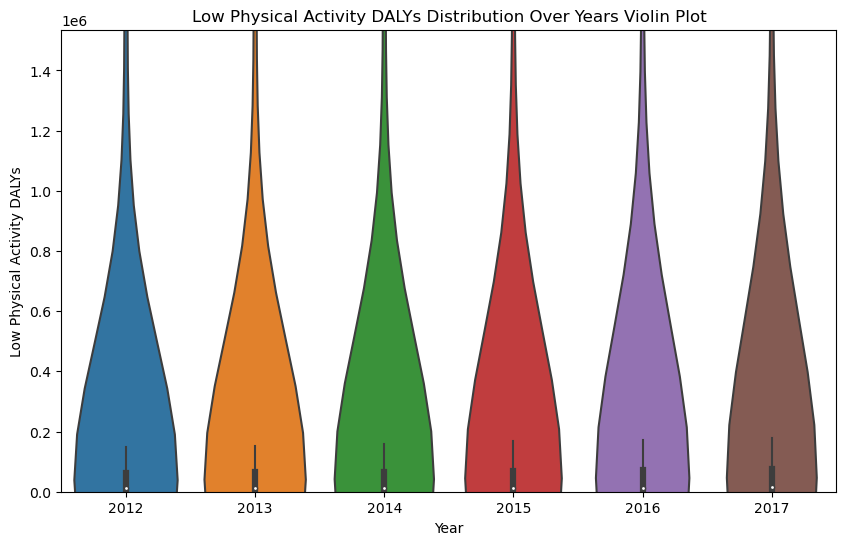

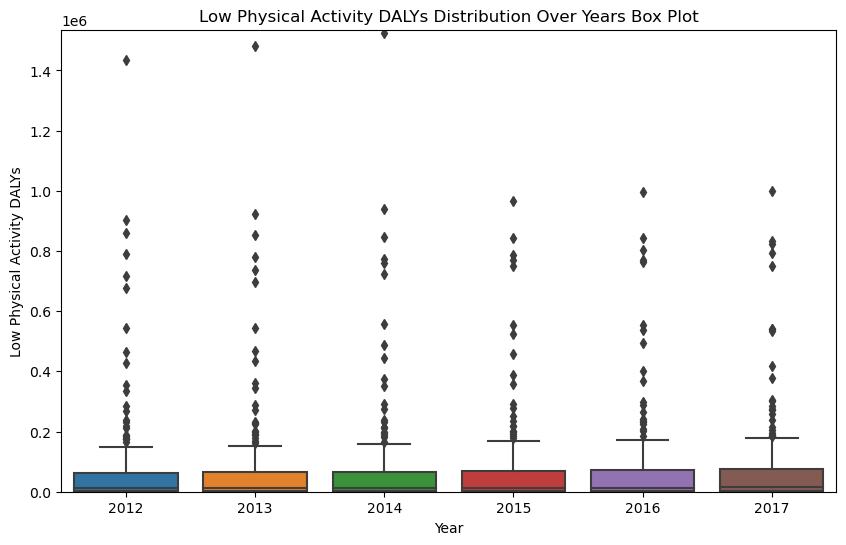

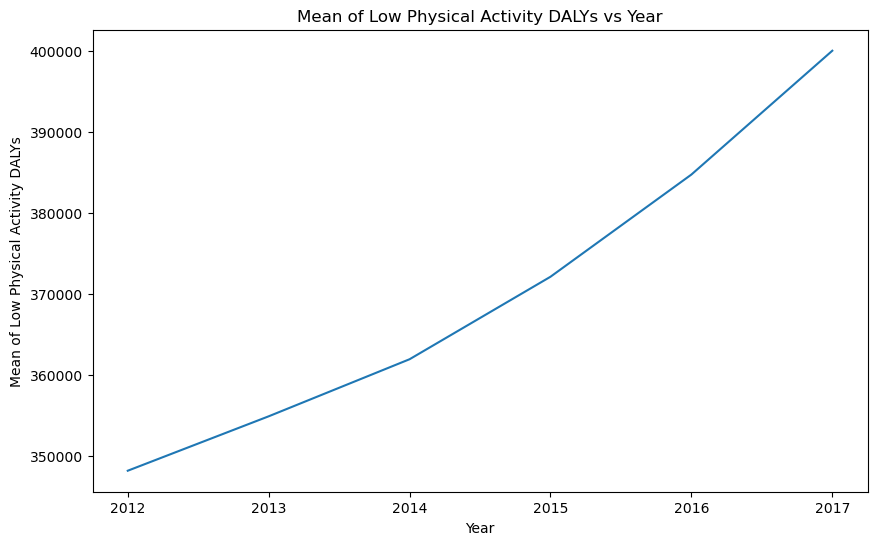

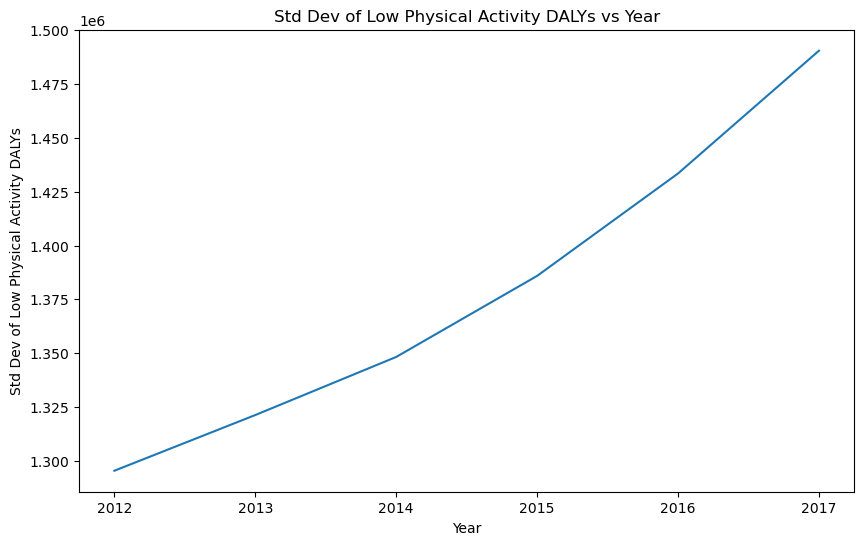

count    1.368000e+03
mean     3.703138e+05
std      1.378328e+06
min      6.550000e+00
25%      2.827562e+03
50%      1.308119e+04
75%      6.594418e+04
max      1.535504e+07
Name: Low Physical Activity DALYs, dtype: float64


In [164]:
graph_feature('Low Physical Activity DALYs')

#### **Analysis of Graphs of Raised Blood Pressure Percentage Distribution Over Years**

Below, we have plotted a box and violin plot for the raised blood pressure percentage distribution from 2012-2017, two line graphs of mean and standard deviation for raised blood pressure percentage from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the raised blood pressure percentage distributions are all unimodal, relatively identical, and mostly normal, which means the mean the raised blood pressure percentage mean in each year is very close to the median. The box plot also show that there is a noticeable number of upper and lower outliers within the raised blood pressure percentage distributions but not as many in the low physical activity DALYs feature. The line graphs indicate that both the mean raised blood pressure percentage increase (from 2012-2017) while the standard deviation fluctuates, which means the center and spread of the raised blood pressure percentage decrease and are generally constant respectively. For the raised blood pressure percentage data overall across all countries from 2012-2017, the mean of raised blood pressure percentage is 24.53% with a standard devation of 3.77% and median of 24.3%. Given all this evidence, the primary conclusion we can draw about the raised blood pressure percentage feature is that it generally decreases with similar distributions, making it likely a major risk factor in heart disease mortality rate predictions. It is also a reliable feature for heart mortality rate predictions within the analysis, hypothesis & ML stage. 

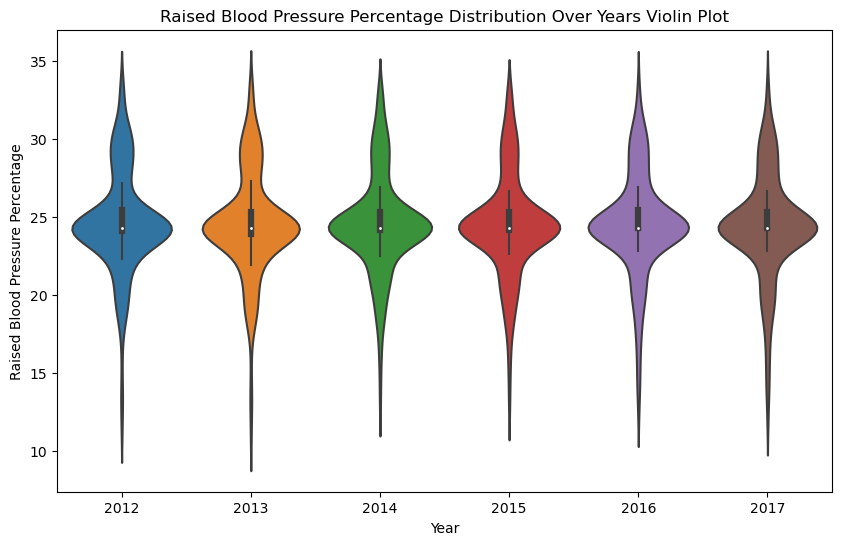

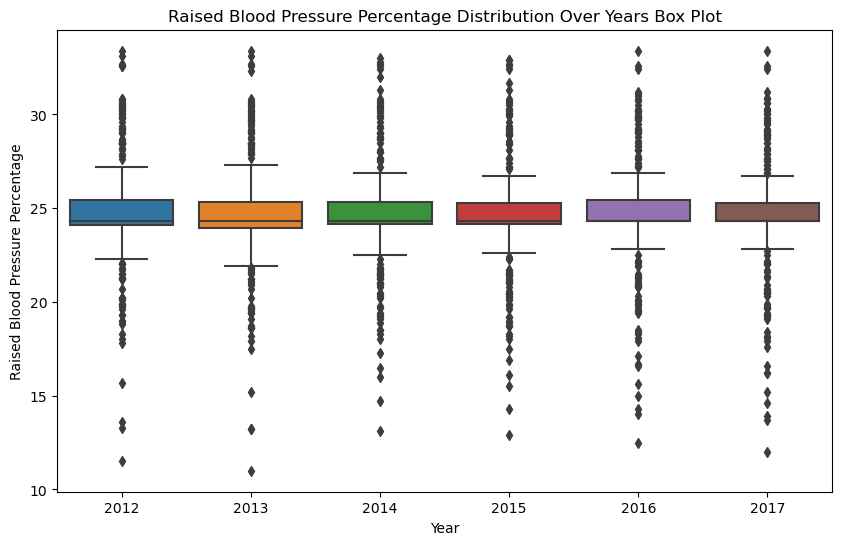

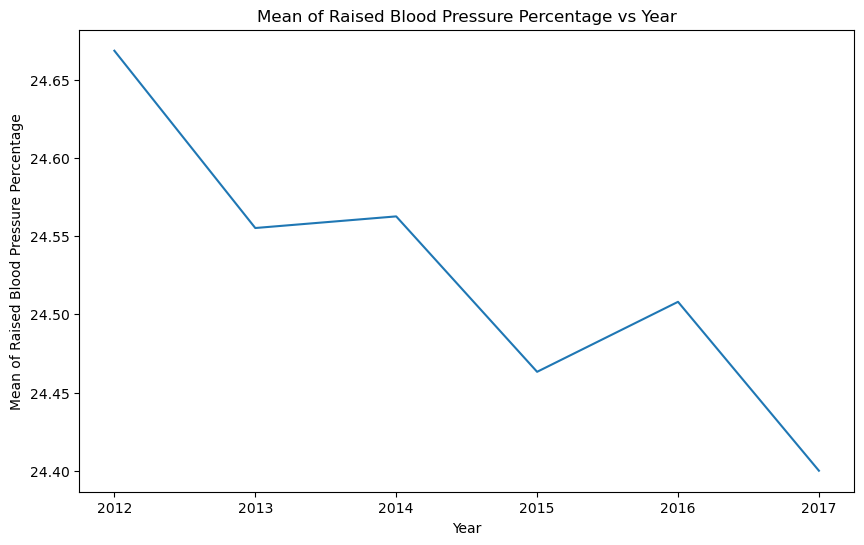

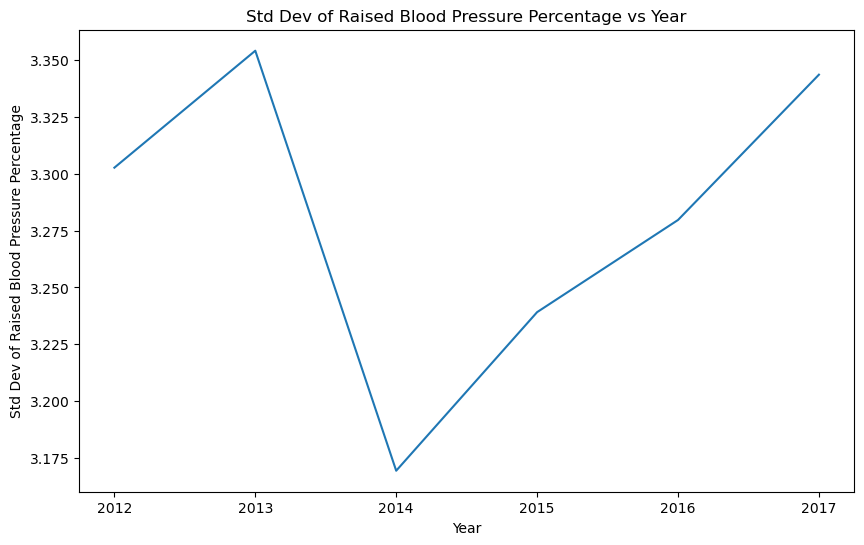

count    1368.000000
mean       24.526325
std         3.277160
min        11.000000
25%        24.107308
50%        24.297181
75%        25.400000
max        33.400000
Name: Raised Blood Pressure Percentage, dtype: float64


In [165]:
graph_feature('Raised Blood Pressure Percentage')

#### **Analysis of Graphs of Type 1 Diabetes Deaths Distribution Over Years**

For the Type 1 diabetes deaths violin and box plots, we had to adjust the y-axis range to get a better view of the structure of the main plot due to the high max values, which means many of the upper outliers aren't included here.

Below, we have plotted a box and violin plot for the Type 1 diabetes deaths distribution from 2012-2017, two line graphs of mean and standard deviation for Type 1 diabetes deaths from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the Type 1 diabetes deaths distributions are all unimodal, relatively identical, and extremely skewed to the left, which means the mean Type 1 diabetes deaths rate in each year is considerably greater than the median. The box plot also show that there is a major number of upper outliers within the Type 1 diabetes deaths distributions. The line graphs indicate that both the mean and standard deviation of Type 1 diabetes deaths increase (from 2012-2017), which means the center and spread of the Type 1 diabetes deaths increase. For the Type 1 diabetes deaths data overall across all countries from 2012-2017, the mean of type 1 diabetes deaths is 1817 with a standard devation of 6830 deaths and median of 91.5. Given all this evidence, the primary conclusion we can draw about the low physical activity DALYs feature is that it generally increases with similar distributions, making it likely a high risk factor in heart disease mortality rate predictions. However, one thing to note is that due to the high bias within it, it may not be the most reliable feature for the actual analysis, hypothesis testing, and ML. 

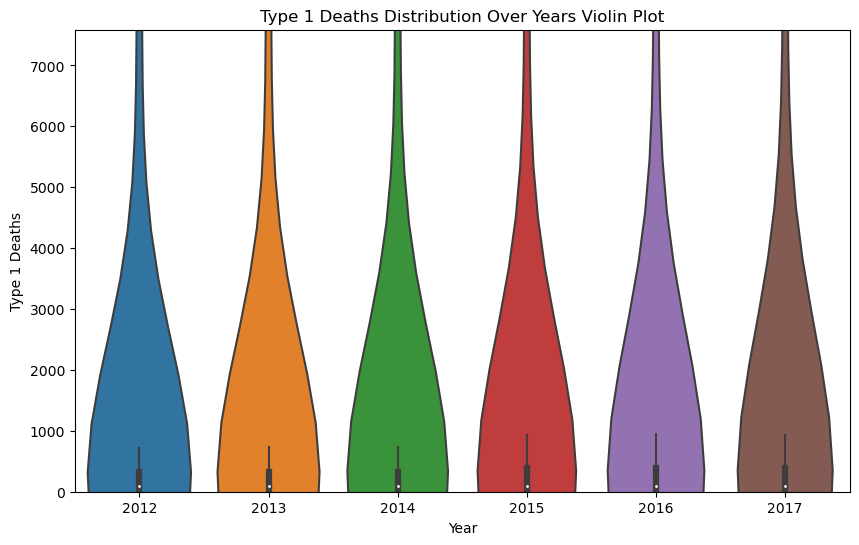

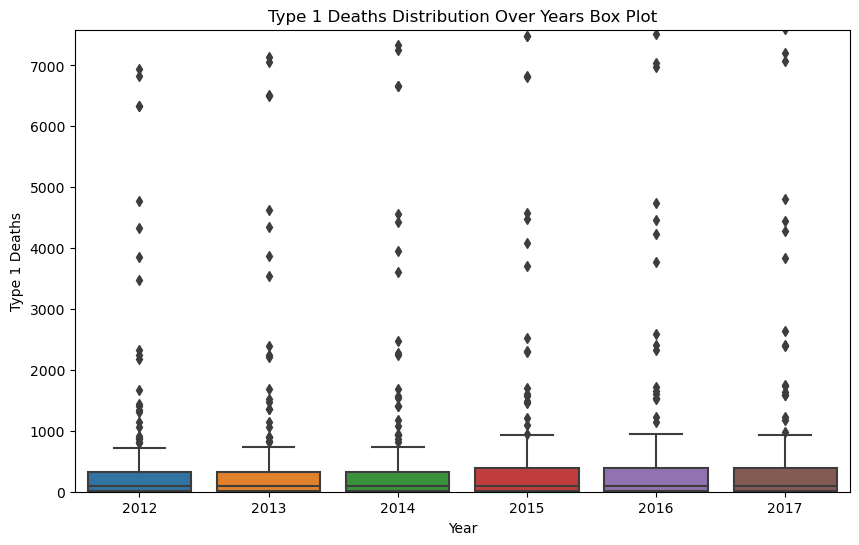

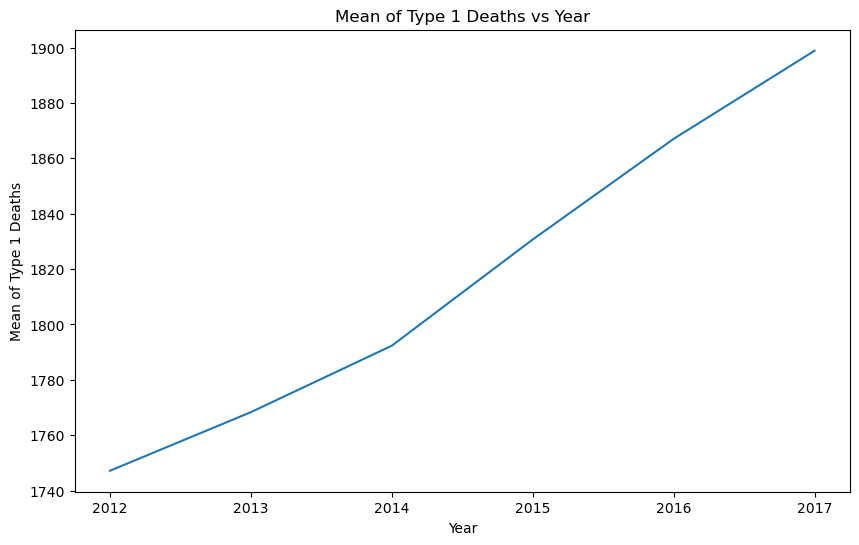

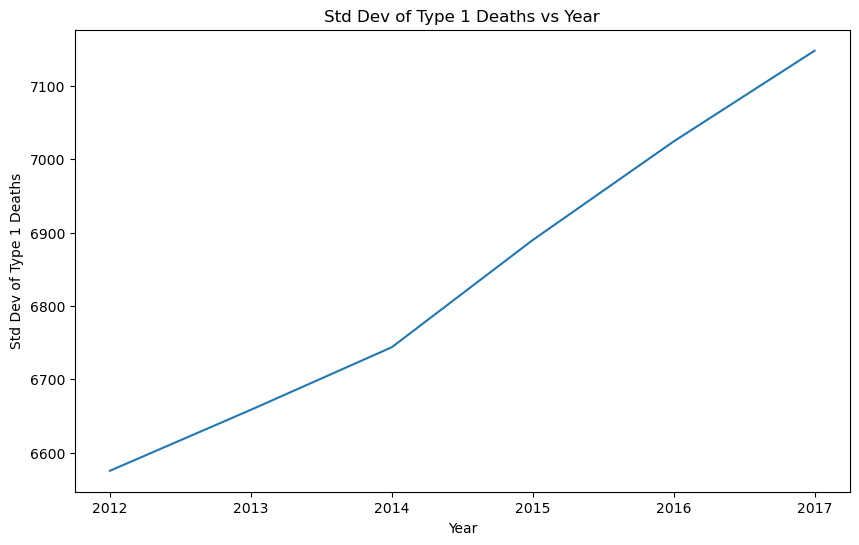

count     1368.000000
mean      1817.410819
std       6830.498356
min          0.000000
25%         15.000000
50%         91.500000
75%        371.500000
max      75870.000000
Name: Type 1 Deaths, dtype: float64


In [166]:
graph_feature('Type 1 Deaths')

#### **Analysis of Graphs of Type 2 Diabetes Deaths Distribution Over Years**

For the Type 2 diabetes deaths violin and box plots, we had to adjust the y-axis range to get a better view of the structure of the main plot due to the high max values, which means many of the upper outliers aren't included here.

Below, we have plotted a box and violin plot for the Type 2 diabetes deaths distribution from 2012-2017, two line graphs of mean and standard deviation for Type 2 diabetes deaths from 2012-2017, and summary statistics. Based on the violin plot, we can tell that the Type 2 diabetes deaths distributions are all unimodal, relatively identical, and extremely skewed to the left, which means the mean Type 2 diabetes deaths rate in each year is considerably greater than the median. The box plot also show that there is a major number of upper outliers within the Type 2 diabetes deaths distributions. The line graphs indicate that both the mean and standard deviation of Type 2 diabetes deaths increase (from 2012-2017), which means the center and spread of the Type 2 diabetes deaths increase. For the Type 2 diabetes deaths data overall across all countries from 2012-2017, the mean of type 2 diabetes deaths is 32745 with a standard devation of 12228 deaths and median of 1586. Given all this evidence, the primary conclusion we can draw about the type 2 diabetes deaths feature is that it generally increases with similar distributions, making it likely a high risk factor in heart disease mortality rate predictions. However, one thing to note is that due to the high bias within it, like type 1 diabetes deaths, it may not be the most reliable feature for the actual analysis, hypothesis testing, and ML. 

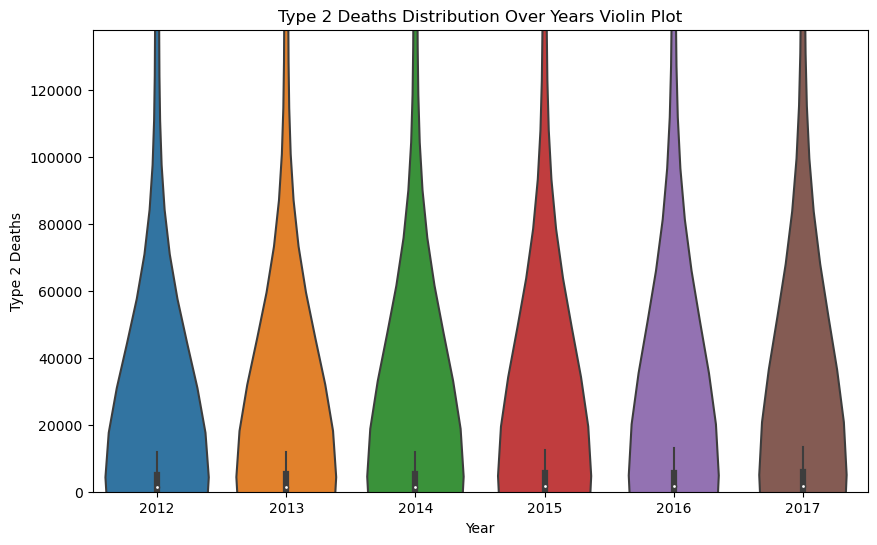

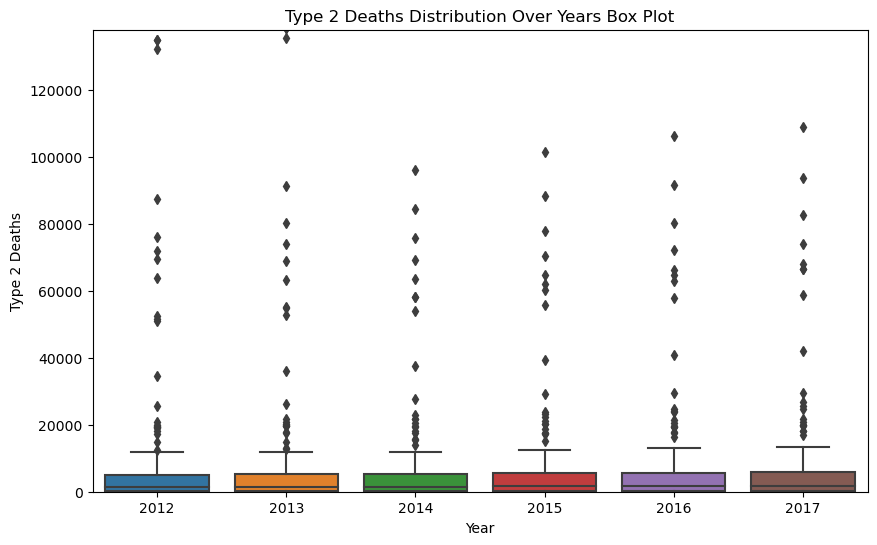

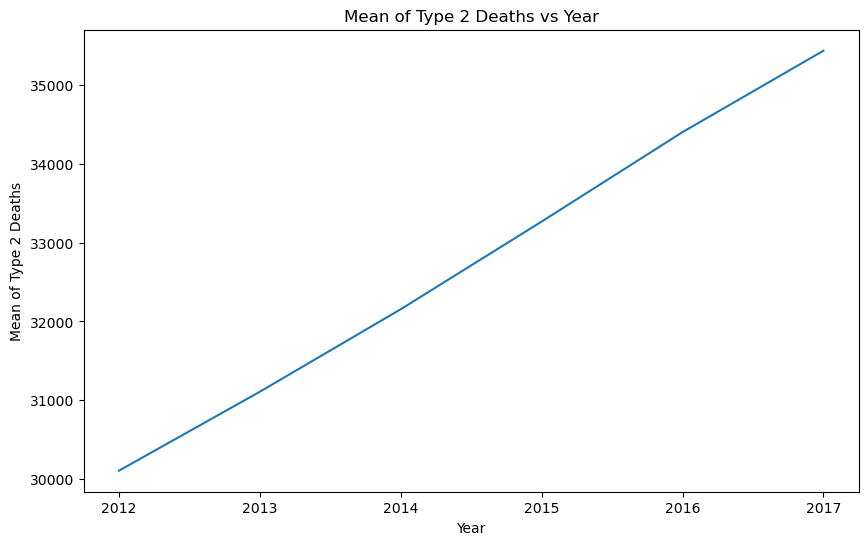

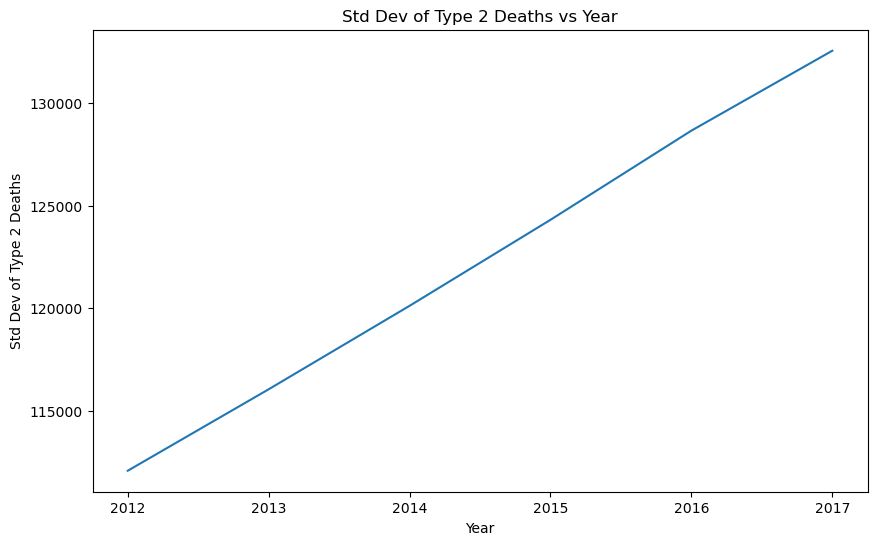

count    1.368000e+03
mean     3.274536e+04
std      1.222827e+05
min      1.000000e+00
25%      2.867500e+02
50%      1.586000e+03
75%      5.520250e+03
max      1.380300e+06
Name: Type 2 Deaths, dtype: float64


In [167]:
graph_feature('Type 2 Deaths')

#### **Analysis of Graphs of Healthcare Expenditure (% of GDP) Distribution Over Years**

Below, we have plotted a box and violin plot for the healthcare expenditure (% of GDP) distribution from 2012-2017, two line graphs of mean and standard deviation for healthcare expenditure from 2012-2017, and summary statistics. Based on the violin plot, we can tell that healthcare expenditure distributions are all unimodal, relatively identical, and skewed to the left, which means the mean healthcare expenditure percentage in each year is considerably greater than the median. The box plot also show that there are upper outliers within the Type 1 diabetes deaths distributions. The line graphs indicate that the mean healthcare expenditure increases while the standard deviation fluctuates (from 2012-2017), which means the center of the healthcare expenditure data increases while the spread remains more constant. For the  healthcare expenditure data overall across all countries from 2012-2017, the mean healthcare expenditure (% of GDP) is 6.31% with a standard devation of 2.53% and median of 5.86%. Given all this evidence, the primary conclusion we can draw about the healthcare expenditure (% of GDP) feature is that it generally increases with similar distributions, making it likely a moderate impact factor in heart disease mortality rate predictions. It can be considered a reliable feature in analysis, hypothesis testing & ML due to the lower bias. 

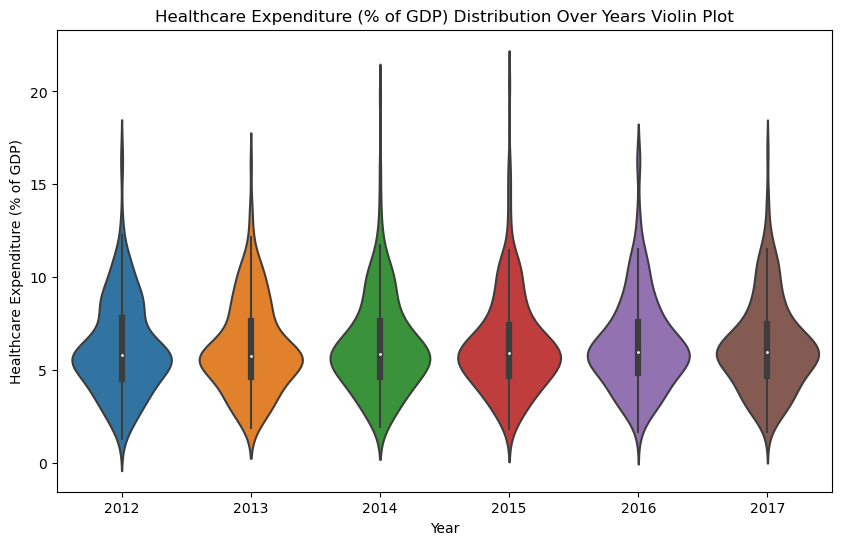

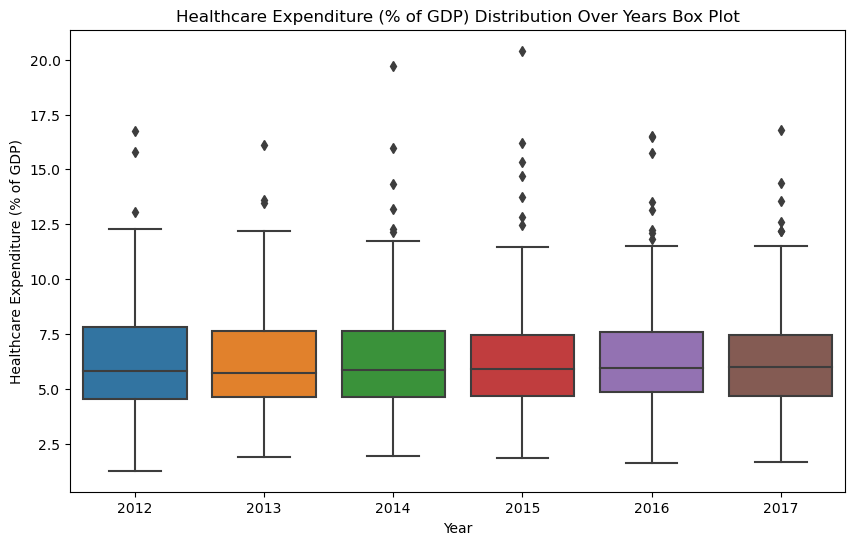

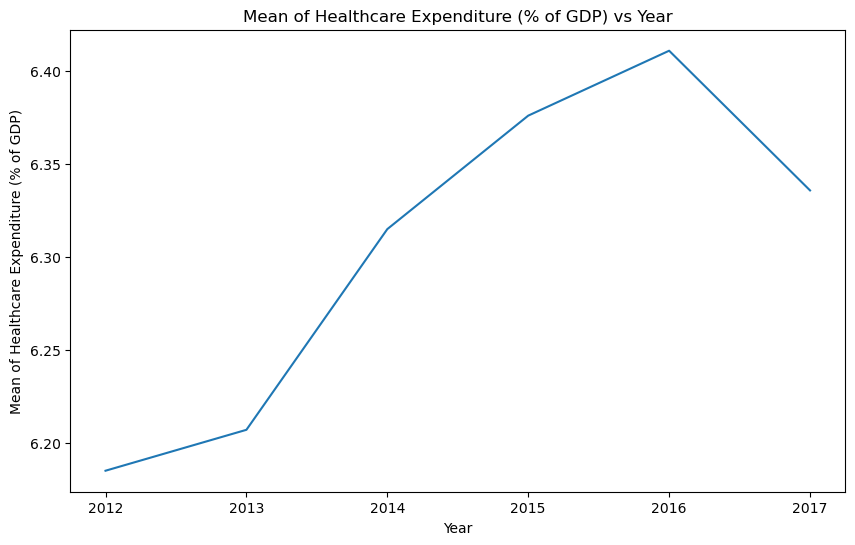

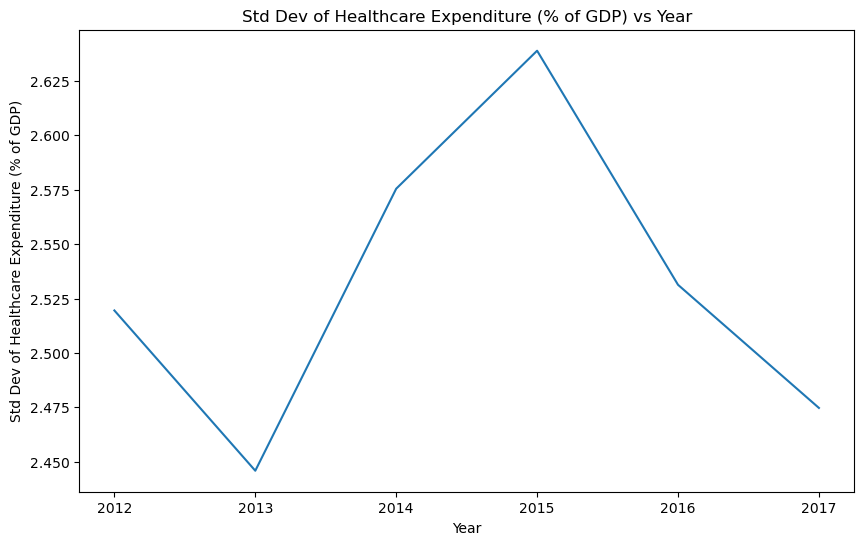

count    1368.000000
mean        6.305126
std         2.528481
min         1.260000
25%         4.660000
50%         5.861182
75%         7.572500
max        20.410000
Name: Healthcare Expenditure (% of GDP), dtype: float64


In [168]:
graph_feature('Healthcare Expenditure (% of GDP)')

#### **Mean and Standard Deviation of Heart Disease Mortality Rate**

The below bar graph shows how the mean and standard deviation of heart disease mortality rate per country changes over time. This chart shows us that countries differ greatly with regards to mean heart disease mortality rate. Although there are too many countries in the table to show which bar corresponds to which country, there is a clearly established pattern. The country with the highest heart disease mortality rate is almost 11 times as much as the country with the lowest heart disease mortality rate. Also, the stardard deviation of heart disease mortality rates within the 6-year period (2012-2017) is much higher in countries with higher heart disease mortality rates. This most likely means that heart disease mortality rates are increasing faster in these countries but we will have to go through the analysis, hypothesis, and ML testing phase to confirm this. \

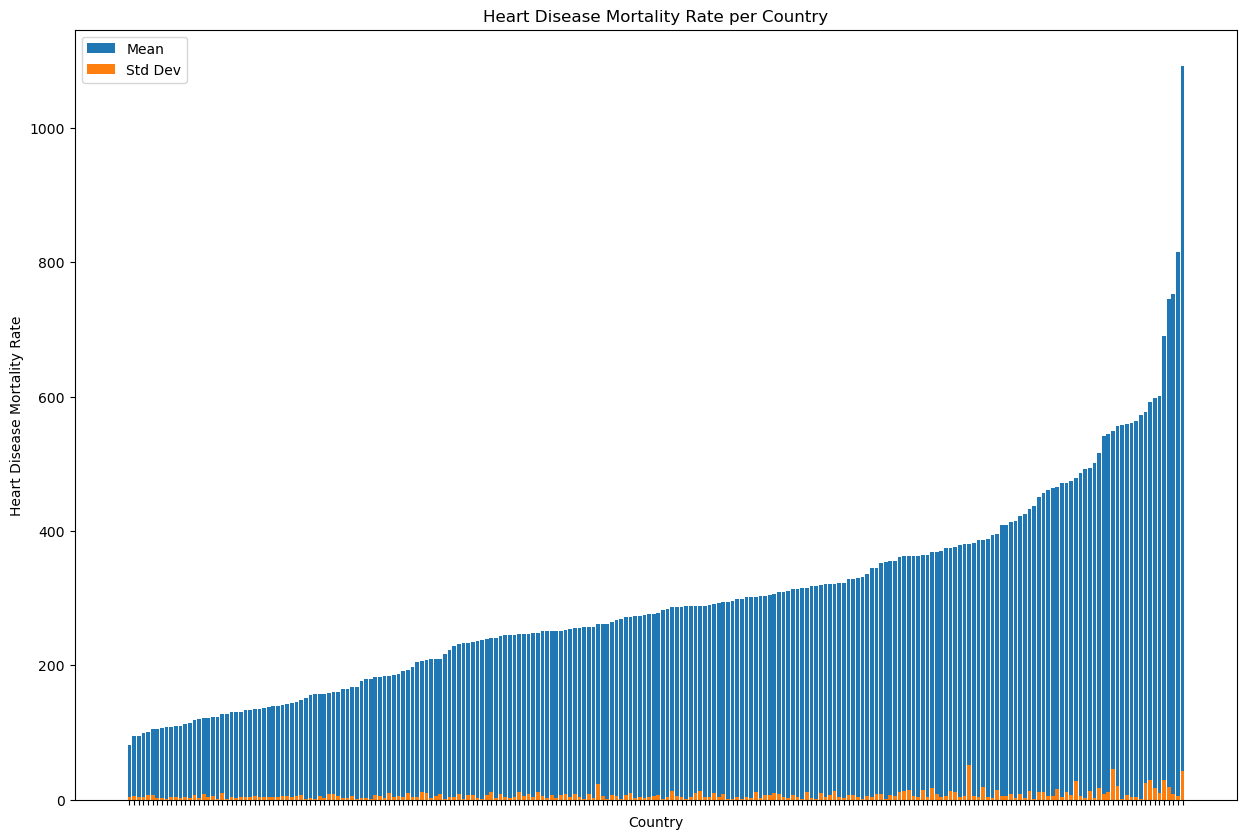

In [169]:
# Label the x and y axes and set the size of the plot figure
plt.figure(figsize=(15, 10))
plt.title('Heart Disease Mortality Rate per Country')
plt.xlabel('Country')
plt.ylabel('Heart Disease Mortality Rate')

# Create two data frames that compute the mean and standard deviation of the heart disease mortality rate for each country
# and merge these values into 1 table 
heart_disease_mortality_rate_mean = heart_disease_death_rates.groupby('Country', as_index=False)['Heart Disease Mortality Rate (Deaths per 100K people)'].mean()
heart_disease_mortality_rate_std = heart_disease_death_rates.groupby('Country', as_index=False)['Heart Disease Mortality Rate (Deaths per 100K people)'].std()
heart_disease_mortality_rate = heart_disease_mortality_rate_mean.merge(heart_disease_mortality_rate_std, how="outer", left_on = ["Country"],  right_on = ["Country"])

# Rename columns in table to have appropriate names
heart_disease_mortality_rate = heart_disease_mortality_rate.rename(columns={"Heart Disease Mortality Rate (Deaths per 100K people)_x": "Mean", "Heart Disease Mortality Rate (Deaths per 100K people)_y": "Std Dev"})
heart_disease_mortality_rate

# Sort heart disease mortality df with mean and std dev per country based on mean
heart_disease_mortality_rate.sort_values('Mean', inplace=True)

# Plot the heart disease mortality rate mean and std dev bar series onto 1 graph
plt.bar(x=heart_disease_mortality_rate['Country'], height=heart_disease_mortality_rate['Mean'], tick_label='')
plt.bar(x=heart_disease_mortality_rate['Country'], height=heart_disease_mortality_rate['Std Dev'], tick_label='')

# Create legend that shows heart disease mortality rate mean and standard deviation by color
plt.legend(['Mean', 'Std Dev'], loc='upper left')

plt.show()


## **Analysis, Hypothesis Testing & ML**

#### **Hypothesis Testing & Linear Regression**
<img src="https://learn.g2.com/hubfs/Imported%20sitepage%20images/1ZB5giUShe0gw9a6L69qAgsd7wKTQ60ZRoJC5Xq3BIXS517sL6i6mnkAN9khqnaIGzE6FASAusRr7w=w1439-h786.png" alt="Alt Text" width="300" height="200">
During the data visualization section, we noticed that there are significant outliers in the Type 1 and 2 diabetes and low physcial activities DALYs feature data. Since this will create a noticeable bias in the prediction, we decided to drop the three features and move forward to the hypothesis testing section. First, we will perform min-max normalization to each feature. We are choosing this over z-standardization because our features have different ranges and we want them to have the same scale and z-standardization made no major differences in the performance. We will also include an 80-10-10 training-validation-test split for the data (models this will be applied to will be indicated in each section). Next, we will perform a z-test on all the data first using the probability of the f-statistic from OLS (ordinary least squares regression) to confirm whether multivariate linear regression is a good fit for the data (the linked [article](https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/) shows an example of how we performed the z-test). In this case, we see the p-value of the F-statistic is 0.568, which is not less than 0.05 or close to 0 and a strong indicator that linear regression may not be the best model for our data as it is likely that the null hypothesis of no relationship between our features and heart disease mortality rate is true. To verify this though, let's try running the linear regression model using sklearn on all the data and check the feature p-values and accuracy score (coefficient of determination).

In [170]:
#Dropping the columns
cols_to_drop = ['Type 1 Deaths', 'Type 2 Deaths', 'Low Physical Activity DALYs']
heart_disease_death_rates = heart_disease_death_rates.drop(columns = cols_to_drop)

#Perform min-max normalization on the data
#columns to normalized excluding country and Year
columns_to_normalized = heart_disease_death_rates.columns[2:]

#Getting the min and max values for each feature 
scaler = MinMaxScaler()

#Performing min-max normalization
heart_disease_death_rates[columns_to_normalized] = scaler.fit_transform(heart_disease_death_rates[columns_to_normalized])

#Renaming the columns to shorten the names
heart_disease_death_rates.rename(columns = {'% of population with anxiety disorders':'Anxiety','Mean BMI':'BMI','Mean HDL Cholesterol':'Cholesterol','Spirits Consumption':'Alcohol','Smoking Death Percentage':'Smoking','Raised Blood Pressure Percentage':'Blood Pressure','Healthcare Expenditure (% of GDP)':'Healthcare Exp','% of overweight adults':'Overweight','Heart Disease Mortality Rate (Deaths per 100K people)':'Heart Disease Mortality Rate'}, inplace= True)

display(heart_disease_death_rates)

# Extract independent variables (features) and dependent variable (target)
X = heart_disease_death_rates.drop(columns=['Country', 'Heart Disease Mortality Rate'])
y = heart_disease_death_rates['Heart Disease Mortality Rate']

# Split data into training, validation, and test samples using 80-10-10 split
trainX, tempX, trainY, tempY = train_test_split(X, y, test_size = 0.2, random_state = 42)
validX, testX, validY, testY = train_test_split(X, y, test_size = 0.5, random_state = 42)


,Country,Year,Anxiety,BMI,Cholesterol,Alcohol,Smoking,Blood Pressure,Healthcare Exp,Overweight,Heart Disease Mortality Rate
0,Afghanistan,2012,0.460098,0.338651,0.375000,0.141140,0.242707,0.870536,0.346736,0.063361,0.508701
1,Afghanistan,2013,0.464530,0.345265,0.375000,0.137901,0.247974,0.870536,0.394256,0.071625,0.498590
2,Afghanistan,2014,0.468789,0.358492,0.375000,0.000000,0.247974,0.875000,0.431854,0.079890,0.491881
3,Afghanistan,2015,0.471569,0.365105,0.375000,0.133309,0.249190,0.875000,0.462141,0.088154,0.488564
4,Afghanistan,2016,0.472390,0.371719,0.375000,0.000000,0.250810,0.834821,0.551436,0.097796,0.483462
...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,0.359238,0.424081,0.461373,0.179645,0.294976,0.593624,0.256924,0.452251,0.238931
1364,Zimbabwe,2014,0.360261,0.419397,0.462015,0.168416,0.300243,0.593624,0.262536,0.452251,0.238198
1365,Zimbabwe,2015,0.360988,0.421819,0.460731,0.166924,0.305916,0.593624,0.265709,0.452251,0.237249
1366,Zimbabwe,2016,0.361265,0.419921,0.463940,0.165311,0.310778,0.593624,0.267524,0.452251,0.235435


In [171]:
# Do a test for whether linear regression is a good fit for the data by using OLS and looking at prob of f-statistic in model summary
formula = "Q('Heart Disease Mortality Rate') ~ Year + Anxiety + BMI + Cholesterol + Alcohol + Smoking + Q('Blood Pressure') + Q('Healthcare Exp') + Overweight"
reg = smf.ols(formula = formula, data = heart_disease_death_rates).fit()
print(reg.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Q('Heart Disease Mortality Rate')   R-squared:                       0.006
Model:                                           OLS   Adj. R-squared:                 -0.001
Method:                                Least Squares   F-statistic:                    0.8517
Date:                               Mon, 14 Aug 2023   Prob (F-statistic):              0.568
Time:                                       21:26:15   Log-Likelihood:                 777.04
No. Observations:                               1368   AIC:                            -1534.
Df Residuals:                                   1358   BIC:                            -1482.
Df Model:                                          9                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

One note to make is that unlike classification, there is no notion of accuracy for regression, so we instead measure the performance of a regression model using the loss function (MSE) and R^2 score. As we can see below, the p-values of all the features are all noticeably above the standard significance level of 0.05 and the coefficient of determination  (R^2) is 0.004 (extremely small), which means we fail to reject the null hypothesis and thus can conclude that there is no statistically significant linear relationship between these features and heart disease mortality rate. We can also conclude that these features don't do a good job of explaining the heart disease mortality rate based on the R^2. Furthermore, we can examine the feature coefficients to see if they logically correlate with heart disease mortality rate in a horizontal bar chart. These coefficients are small and it seems that alcohol consumption and BMI are negatively correlated with heart disease mortality rate, which doesn't make sense as we would expect them to increase it. Healthcare expenditure being negatively correlated with heart disease mortality rate. For overweight, blood pressure, smoking, and year, there's no clear correlation. For cholesterol and anxiety, they are positively correlated with heart disease mortality rate, which logically makes sense. Even though these feature coefficients are extremely small and prove there is no linear relationship, they still give us some insights into feature correlations with heart disease mortality rate. 

One more thing we can do is run a linear regression model on randomly sampled training and test data (80-20 split in this case, not including validation data) to get the MSE and accuracy score (R^2) for the test data. Although the MSE (0.017) is very low, the R^2 score is -0.02, which means this linear regression model's predictions don't match the expected heart disease mortality rates very well. In the end, all this evidence confirms our assumption that multivariate linear regression was not the best model for the data. We should test some other models. 

Feature: Year
P-value: 0.2997403454148443

Feature: Anxiety
P-value: 0.7329907670518356

Feature: BMI
P-value: 0.28469253882980683

Feature: Cholesterol
P-value: 0.3230816945881244

Feature: Alcohol
P-value: 0.12618638983138056

Feature: Smoking
P-value: 0.8348375778233341

Feature: Blood Pressure
P-value: 0.7269949529751873

Feature: Healthcare Exp
P-value: 0.7550205891418605

Feature: Overweight
P-value: 0.505752996291276

Linear Regression Model Score for Full Data (R^2):  0.005612852135620683


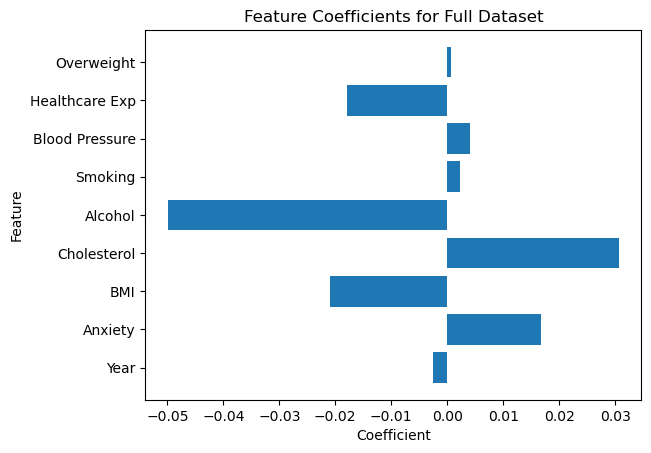

Linear Regression Model MSE Score on Test Data:  0.017842903366512217
Linear Regression Model R2 Score on Test Data:  -0.021220160172261027


In [172]:
# Create a linear regression model for all the data
lin_reg_model = LinearRegression()

# Fit the model to all the dat
lin_reg_model.fit(X, y)

# Perform the F-test for all the data
f_values, p_values = f_regression(X, y)

# Display  p-values for each feature
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}")
    print(f"P-value: {p_values[i]}\n")

# Show lin reg model score (coefficient of determination)
print("Linear Regression Model Score for Full Data (R^2): ", lin_reg_model.score(X, y))

# Stacked bar chart that plots feature coefficients to show how they are correlated with heart disease mortality rate
# Set bar chart size and axis labels
plt.figure()
plt.title('Feature Coefficients for Full Dataset')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

# Create horizontal bar graph with features on the y-axis and the feature coefficient as a width along the x axis
plt.barh(y=X.columns, width=lin_reg_model.coef_)
plt.show()

# Create linear regression model that will fit on randomly sampled training data and then make predictions on test data so we can measure MSE & R^2 score 
# to see how well lin reg performs (explains) on the data
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(trainX, trainY)
linTestX = tempX
linTestY = tempY
yTestPred = lin_reg_model2.predict(linTestX)
linMSE = mean_squared_error(linTestY, yTestPred)
lin_r2 = r2_score(linTestY, yTestPred)
print("Linear Regression Model MSE Score on Test Data: ", linMSE)
print("Linear Regression Model R2 Score on Test Data: ", lin_r2)


#### **Random Forests & Feature Importance**



<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/50/f9/ICLH_Diagram_Batch_03_27-RandomForest.component.xl.ts=1679336476850.png/content/adobe-cms/us/en/topics/random-forest/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative0/image" alt="Alt Text" width="600" height="300">

One model we can explore is a random forest, which is an ensemble model that uses bootstrapping to create multiple copies of a dataset through random sampling by replacement and builds a decision tree upon each dataset. It will also pass in any testing observation to all those decision trees and whatever output prediction has the majority vote among all those decision trees will be returned as the predicted value for that observation. In our case, random forest would build an ensemble of decision trees to predict heart disease mortality rate. We will fit a random forest regressor on the data set to predict the heart disease mortality rate and measure its score to determine if it is the optimal model. You can view [this doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for more information on the sklearn random forest regressor.  This regressor will also give us insight into the importance of each feature, which tells us how useful each feature is in making our model accurately predict heart disease mortality rate. These feature importances will be plotted on a horizontal bar graph. We will use squared error (MSE) as the impurity measure and 100 estimators AKA decision trees as we found this to be the best number of decision trees and any more than that would lead to no change in the feature importances.

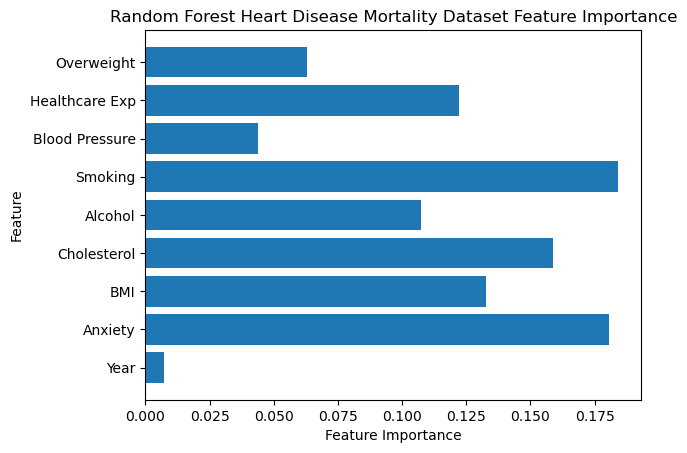

In [173]:
# Use random forest regressor to fit on data and get feature importance with 100 decision trees and MSE criterion
rf_reg = RandomForestRegressor(n_estimators=100, criterion="squared_error")
rf_reg = rf_reg.fit(X, y)

# Set feature importance plot axis labels
plt.figure()
plt.title('Random Forest Heart Disease Mortality Dataset Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Create horizontal bar graph with features on the y-axis and the importance of each feature as the width
plt.barh(y=X.columns, width=rf_reg.feature_importances_)
plt.show()

Based on the above bar graph, it appears that smoking and anxiety are the two most important features in accurately predicting heart disease mortality rate while blood pressure and % of overweight adults and year are the three least important features with year barely having any importance. The top 2 features make sense but the last 3 features are questionable. However, one thing to keep in mind is that this feature importance plot is generated from the whole dataset so it might make more sense to find the importance of each feature for each country and use that information to compute the mean importance of each feature across all countries. We also should find the MSE and R^2 scores of the random forest regressor, which learns from 80% randomly sampled training data, on 20% randomly sampled test data to show that the random forest's predictions are very close to the expected heart disease mortality rates.

Random Forest Regressor MSE Score on Test Data:  0.0043655489784556155
Random Forest Regressor R2 Score on Test Data:  0.7501423094973728


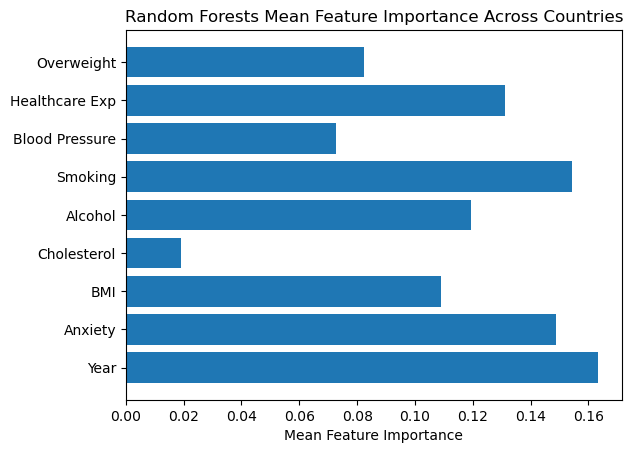

In [174]:
# Creating second random forest regressor to run on randomly sampled training and test data and measure how strong of a fit random forest is for predicting heart disease mortality rates
rf_reg2 = RandomForestRegressor(n_estimators = 100, criterion = "squared_error")
rf_reg2 = rf_reg2.fit(trainX, trainY)
rfTestX = tempX
rfTestY = tempY
rf_yTestPred = rf_reg2.predict(rfTestX)
rfMSE = mean_squared_error(rfTestY, rf_yTestPred)
rf_r2 = r2_score(rfTestY, rf_yTestPred)
print("Random Forest Regressor MSE Score on Test Data: ", rfMSE)
print("Random Forest Regressor R2 Score on Test Data: ", rf_r2)

# Create data frame that will store feature importances for all countries
featureImportancesDf = pd.DataFrame(columns = ['Country', 'Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight'])
featureImportancesDf['Country'] = heart_disease_death_rates['Country'].unique()
countryIndex = 0

# Iterate through each country once
for country in featureImportancesDf['Country']:
    # Create and populate data frames for input features and output feature of the current country
    countryX = pd.DataFrame(columns = ['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight'])
    countryY = heart_disease_death_rates[heart_disease_death_rates['Country'] == country]['Heart Disease Mortality Rate']

    for feature in countryX.columns:
        countryX[feature] = heart_disease_death_rates[heart_disease_death_rates['Country'] == country][feature]

    # using random forest regressor to get feature importances
    rf_reg3 = RandomForestRegressor(n_estimators=100, criterion="squared_error")
    rf_reg3 = rf_reg3.fit(countryX, countryY)
    countryFeatureImportances = rf_reg3.feature_importances_.tolist()
    
    # Put the importance of each of this country's features into the values of the features corresponding to the country's row
    j = 0
    for feature in countryX.columns:
        featureImportancesDf.loc[countryIndex, feature] = countryFeatureImportances[j]
        j += 1

    countryIndex += 1

# Compute list containing mean feature importance of 9 input feature
meanFeatureImportances = []
for feature in X.columns:
    meanFeatureImportances.append(featureImportancesDf[feature].mean(axis = 0))

# Set mean feature importance plot axis label and title
plt.figure()
plt.title('Random Forests Mean Feature Importance Across Countries')
plt.xlabel('Mean Feature Importance')

# Create horizontal bar graph with features on the y-axis and each mean feature importance as the width
plt.barh(y=X.columns, width=meanFeatureImportances)
plt.show()


Based on the above results, the Random Forest Regressor has an extremely low MSE and the R^2 value is between 0.74-0.78, which indicates that 74%-78% of the heart disease mortality output data is correctly explained by the random forest predictions. This demonstrates that the Random Forest Regressor is significantly better than the linear regression and will provide reliable insights. However, we will also test other models (decision trees, K-Nearest Neighbors, neural network) to identify the best one. The mean feature importance plot has major differences compared to the previous feature importance plot. Here, year, anxiety, smoking, and healthcare expenditure are the 4 most important features with relatively close mean importances. BMI and alcohol then come next being close to each other, overweight and blood pressure follow, and we finally have cholesterol as the least important feature. While this plot does show us the most important features that the random forest regressor identifies when training, it might be a good idea to create a bar chart that shows the number of countries that have their most important as the current feature across all features (excluding year) to verify this matches the trend we observe in the random forest mean importance plot.

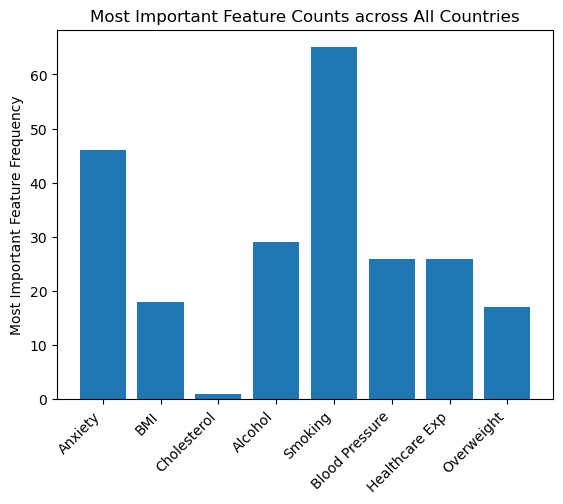

In [175]:
# Make a copy of the feature importances data frame for the heart disease mortality data set and drop the country and year, 
# columns as the country isn't a feature and the year being the most important feature of a country doesn't make sense
featureImportancesDfCopy = featureImportancesDf.copy()
featureImportancesDfCopy.drop('Country',axis=1,inplace=True)
featureImportancesDfCopy.drop('Year',axis=1,inplace=True)

# Create dict that has features as keys and the number of countries with that feature as their most important feature for each feature as values
mostImportantFeaturesCountsDict = dict()
for feature in featureImportancesDfCopy.columns:
    mostImportantFeaturesCountsDict[feature] = 0

# Iterate through each row (country)
for index, row in featureImportancesDfCopy.iterrows():
    currentMostImportantFeature = featureImportancesDfCopy.columns[0]
    # Find feature in current row that has highest feature importance and increment count of that feature
    for feature in featureImportancesDfCopy.columns:
        if row[feature] > row[currentMostImportantFeature]:
            currentMostImportantFeature = feature
    mostImportantFeaturesCountsDict[currentMostImportantFeature] += 1

plt.title('Most Important Feature Counts across All Countries')
plt.ylabel('Most Important Feature Frequency')

# create horizontal bar graph with features (without year) on the y-axis and the importance of each feature as the width
plt.bar(x=featureImportancesDfCopy.columns, height=list(mostImportantFeaturesCountsDict.values()))
plt.xticks(rotation=45, ha="right")
plt.show()

The results from the above bar chart that shows the counts of countries that have each feature as their most important feature are consistent with the mean importance plot we get from the random forest regressor. Here, smoking and anxiety have the highest number of countries that have them as their most important features and in the mean importance plot, these 2 features have the highest importance values (excluding year). Cholesterol very clearly also has the lowest count of countries that have it as their most important feature similar to it having the least importance from the mean feature importance plot and the rest of the features are relatively close in similarity between these two plots. This bar chart is an accurate reflection of what we got from the random forest regressor mean feature importance plot, meaning we can rely upon the insights from both these plots.

Another step that might help us further examine feature importance is to create a data frame that ranks the features from highest to least importance for each country (1st to 8th most important features). That way, we know what feature has the greatest effect (positive or negative depending upon feature) upon heart disease mortality rate in each country and what feature has the least importance (impact) upon the heart disease mortality rate in each country (may entail being improved or addressed depending upon the feature to reduce heart disease mortality rate). The code below will generate this data frame.

In [176]:
# Create a new data frame that will store the feature rankings of each country and appropriate column names
countryFeatureRankingsDf = pd.DataFrame(columns = ['Country', '1st Important Feature', '2nd Important Feature', '3rd Important Feature', '4th Important Feature', 
                         '5th Important Feature', '6th Important Feature', '7th Important feature', '8th Important Feature'])

# Iterate through every row of the feature importances dataframe
for index, row in featureImportancesDfCopy.iterrows():
    # Add name for current country to new data frame
    countryFeatureRankingsDf.loc[index, 'Country'] = featureImportancesDf.loc[index, 'Country']
    # Create dict that stores the 8 features (keys) and their values for the current row from the importances data frame
    featureValsDict = dict()
    for feature in featureImportancesDfCopy.columns:
        featureValsDict[feature] = row[feature]
    
    # Sort the features (keys) by their values in the feature vals dict in descending order
    sortedFeatureValsDict = dict(sorted(featureValsDict.items(), key=lambda x:x[1],  reverse = True))
    
    # Add sorted feature names (most to least important) to columns in data frame
    featureIndex = 0
    for feature in countryFeatureRankingsDf.columns[1:]:
        features = list(sortedFeatureValsDict.keys())
        currentFeature = features[featureIndex]
        countryFeatureRankingsDf.loc[index, feature] = currentFeature
        featureIndex += 1

countryFeatureRankingsDf


,Country,1st Important Feature,2nd Important Feature,3rd Important Feature,4th Important Feature,5th Important Feature,6th Important Feature,7th Important feature,8th Important Feature
0,Afghanistan,Alcohol,BMI,Smoking,Anxiety,Overweight,Healthcare Exp,Blood Pressure,Cholesterol
1,African Region (WHO),Blood Pressure,BMI,Anxiety,Alcohol,Healthcare Exp,Overweight,Smoking,Cholesterol
2,Albania,Blood Pressure,Healthcare Exp,Anxiety,Overweight,Alcohol,Smoking,BMI,Cholesterol
3,Algeria,Healthcare Exp,Anxiety,Overweight,Smoking,BMI,Alcohol,Blood Pressure,Cholesterol
4,American Samoa,Healthcare Exp,Anxiety,Overweight,Smoking,Blood Pressure,BMI,Alcohol,Cholesterol
...,...,...,...,...,...,...,...,...,...
223,World Bank Lower Middle Income,Alcohol,Anxiety,BMI,Cholesterol,Healthcare Exp,Smoking,Blood Pressure,Overweight
224,World Bank Upper Middle Income,Alcohol,Smoking,Healthcare Exp,Anxiety,BMI,Cholesterol,Blood Pressure,Overweight
225,Yemen,BMI,Healthcare Exp,Cholesterol,Smoking,Alcohol,Anxiety,Blood Pressure,Overweight
226,Zambia,Healthcare Exp,Anxiety,Smoking,Alcohol,BMI,Cholesterol,Blood Pressure,Overweight


Now that we have create the data frame above that shows the rankings of the features for each country, we can now plot a map that shows the most important feature for each of the 228 countries/development zones using the chloropleth function from the plotly.express module. This will help us visualize what is the most significant feature that impact heart disease mortality rate within each country with a legend of different colors for each feature. To actually map the values onto the map, we need the geospatial data of the countries, which can be found by downloading countries.geo.json from the World Geo Repository via [this link](https://www.kaggle.com/datasets/chapagain/country-state-geo-location). If you would like to learn more about how maps are made via plotly, feel free to read [this doc](https://plotly.com/python/choropleth-maps/). This map only contains 193 countries so the other 35 development zones and non-country states will not be included here. One thing to note is that since an interactive map can't appear within an HTML file, we had to take a screenshot of our heatmap to be able to show it in the Jupyter Notebook HTML.

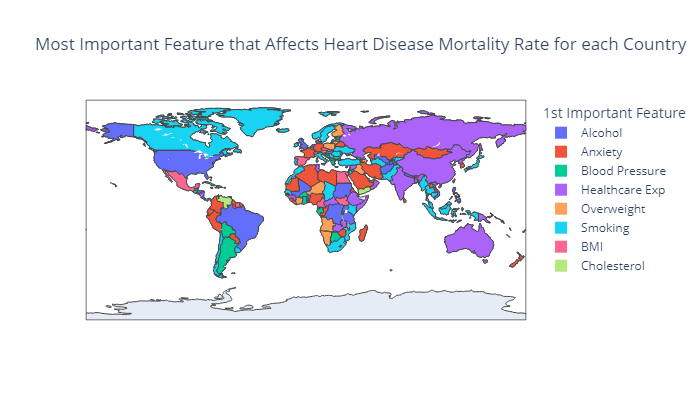

In [177]:
# Read in the geospatial data from the countries JSON file
filePath = r'data/countries.geo.json'

# Create choropleth that shows 1st most important feature that affects heart disease mortality rate
fig = plex.choropleth(countryFeatureRankingsDf, geojson=filePath, color="1st Important Feature", locations="Country", 
                    locationmode = 'country names', featureidkey="feature.properties.name", 
                    title="Most Important Feature that Affects Heart Disease Mortality Rate for each Country", width = 700, height = 400)

# The interactive map does not correctly show on the HTML, so instead we took a screenshot (PNG) was taken of it and it is shown below
Image(filename = "most_important_feature_countries.png")

# This would show the interactive map (as shown in the HTML) in the notebook in your local IDE
#fig.show()

#### **KNN (K-Nearest-Neighbors)**

<img src="https://www.researchgate.net/profile/Asis-Chattopadhyay/publication/281289672/figure/fig1/AS:391475587239941@1470346461648/In-this-k-Nearest-Neighbor-illustration-with-k-5-the-central-black-square-more.png" alt="Alt Text" width="300" height="200">


Another model we can explore for the heart disease mortality dataset is the K-nearest Neighbors Regressor, which computes the Euclidean distance between the current test record and all other test records, sorts the distances in ascending order, picks the record with the k smallest distances, and then takes the average of the heart disease mortality rates for those chosen records. That average will be the prediction for this test record. We decided to use 5-nearest neighbors regressor on the training and testing data and got a low MSE (0.01) but an R2 score of -0.09, which means KNN is not a good for this dataset. However, we were able to draw some other insights. First, we found the permutation importance of the features from the validation data, which consistently show us that smoking is the top feature that contributes to higher heart disease mortality rate but something interesting we found is that BMI and cholesterol are the next two most important fatures. This conflicts with what we found in the random forest regressor as anxiety and healthcare expenditure are the next two most important features, which means that these KNN insights are not accurate. Next, we found all the feature importances, which were extremely small (close to 0) and the KNN score for each country (all scores are extremely close to 0), which are further evidence that KNN is not a good model for this data. Overall, the KNN and linear regression models were not good fits for the heart disease mortality data set and as of now, the random forest regressor is the most reliable and insightful model.


KNN Regressor MSE Score on Test Data:  0.019130811644500312
KNN Regressor R2 Score on Test Data:  -0.09493226133190946


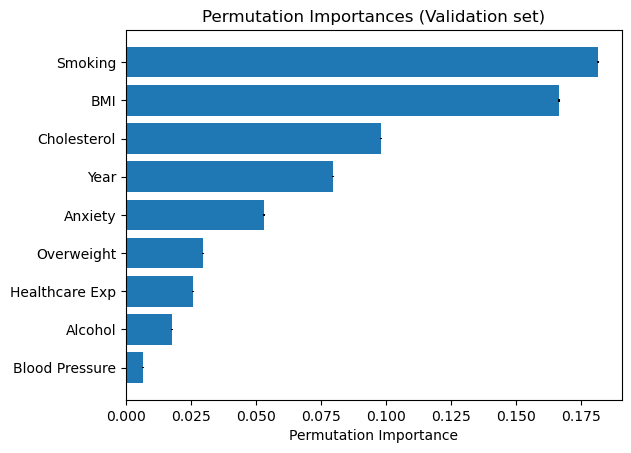

,Country,KNN_Score
0,Afghanistan,5.196284e-05
1,African Region (WHO),7.138436e-06
2,Albania,2.810171e-06
3,Algeria,3.605194e-05
4,American Samoa,3.612587e-07
...,...,...
223,World Bank Lower Middle Income,2.209181e-05
224,World Bank Upper Middle Income,4.637130e-05
225,Yemen,5.186257e-06
226,Zambia,5.895027e-06


Feature: BMI, Importance: 0.011078756469962592
Feature: Anxiety, Importance: 0.01011601046907551
Feature: Cholesterol, Importance: 0.007020322219451036
Feature: Smoking, Importance: 0.005639824480505373
Feature: Alcohol, Importance: 0.002560696268954721
Feature: Year, Importance: 0.0
Feature: Overweight, Importance: -0.0004155325743920857
Feature: Blood Pressure, Importance: -0.0015626018777410433
Feature: Healthcare Exp, Importance: -0.0044975838213016095


In [178]:
# Create and fit 5-nearest neighbors KNN regressor on training X and y data
knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(trainX, trainY)

# Making predictions on test X data and compute MSE and R2 scores between test predictions and expected outputs
knn_yTestPred = knn_reg.predict(rfTestX)  
knnMSE = mean_squared_error(rfTestY, knn_yTestPred)
knn_r2 = r2_score(rfTestY, knn_yTestPred)

print("KNN Regressor MSE Score on Test Data: ", knnMSE)
print("KNN Regressor R2 Score on Test Data: ", knn_r2)


# Compute permutation importances
perm_importance = permutation_importance(knn_reg, validX, validY, n_repeats=30, random_state=42)

# Extract importances and their standard deviations
importances = perm_importance.importances_mean
std = perm_importance.importances_std

# Sort the features based on importance
sorted_idx = importances.argsort()

# Plotting the features
plt.title('Permutation Importances (Validation set)')
plt.barh(validX.columns[sorted_idx], importances[sorted_idx], yerr=std[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.show()


# Computing knn score for each country
country_knn_scores = []

for country in featureImportancesDf['Country']:
    countryX = pd.DataFrame(columns = ['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight'])
    countryY = heart_disease_death_rates[heart_disease_death_rates['Country'] == country]['Heart Disease Mortality Rate']

    for feature in countryX.columns:
        countryX[feature] = heart_disease_death_rates[heart_disease_death_rates['Country'] == country][feature]

    knn_reg_country = KNeighborsRegressor(n_neighbors=5)
    knn_reg_country.fit(countryX, countryY)
    country_yPred = knn_reg_country.predict(countryX)
    
    mse_country = mean_squared_error(countryY, country_yPred)
    country_knn_scores.append((country, mse_country))


# Creating new data frame that scores each country and its KNN score
country_scores_df = pd.DataFrame(country_knn_scores, columns=['Country', 'KNN_Score'])
display(country_scores_df)


#Fit KNN regressor on X and y data and create feature scores dict
original_score = knn_reg.score(X, y)
feature_scores = {}

# Iterate through each feature
for feature in X.columns:
    
    X_perturbed = X.copy()
    
    # Add random noise to the feature
    X_perturbed[feature] = X_perturbed[feature] + np.random.normal(0, 0.01, size=X_perturbed[feature].shape)
    
    # Measure the score after perturbation
    perturbed_score = knn_reg.score(X_perturbed, y)
    
    # The change in the score can be an indicator of the feature's importance
    feature_scores[feature] = original_score - perturbed_score

# Sort the features based on the score change
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Printing out feature importances
for feature, score in sorted_features:
    print(f"Feature: {feature}, Importance: {score}")

### **Decision Tree**
<img src="https://cdn-icons-png.flaticon.com/512/1960/1960299.png" alt="Alt Text" width="300" height="200">
The last model we will explore is the Decision Tree Regressor. 
This model works by selecting the best splits to divide a dataset by. It uses an algorithm that prioritizes the selection of splitting features with polar, non-mixed, outcomes. 

The first thing we will do, is split our data into testing and training sets. This way, 
have a chunk of "new" data we can test the effectiveness of our model with after we are finished training it.

In [266]:
# Create the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# we will use this to split up our dataframe
from sklearn.model_selection import train_test_split
# we will use this to test how good our model is
from sklearn.metrics import mean_squared_error
# help visualize the tree
from sklearn.tree import plot_tree
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

# the random seed we will use
seed = 42

# Split the DataFrame into train, validation, and test sets
train_df, test_df = train_test_split(heart_disease_death_rates, test_size=0.2, random_state=seed)


# Print the shapes of the sets
print("Original set shape:",heart_disease_death_rates.shape)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Original set shape: (1368, 11)
Train set shape: (1094, 11)
Test set shape: (274, 11)


Next, we train our training set. This is when the actual decision tree is formed. Now that the tree
is formed, the data that we input (in this case X_test) will be conditionally evaluated until it reaches
the leaves of the tree structure, where it will then output the constant value of this final segment. This constant value becomes out prediction.
Once we have our predictions we can use terms like figures like mean squared error, and R-square score to evaluate how effective our model is as making predictions, relative to other models.

In [278]:
# Separate features and target
X_train = train_df[['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 
'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight']]
y_train = train_df["Heart Disease Mortality Rate"]
X_test = test_df[['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 
'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight']]
y_test = test_df[["Heart Disease Mortality Rate"]]

# Create and fit a DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)


Mean Squared Error: 0.009954133889098413
R-squared score: 0.43028541959826494


Lets take a look at some of the values our model predicted. 
How do those predictions compare to what the data actually says?
One way we can visualize this is by first sorting all the outcome test data to 
make our plot more readable. Next, we use the indices of the sorted data, and sort 
our prediction data by those same indices. This preserves the relative order of the 
test and prediction sets. 

When we plot this data, we notice that predictions and actual data don't always match up. 
There are several instances where the prediction is significantly different from the real outcome. But value of a regressor is in its ability to generalize, rather than over fit data.

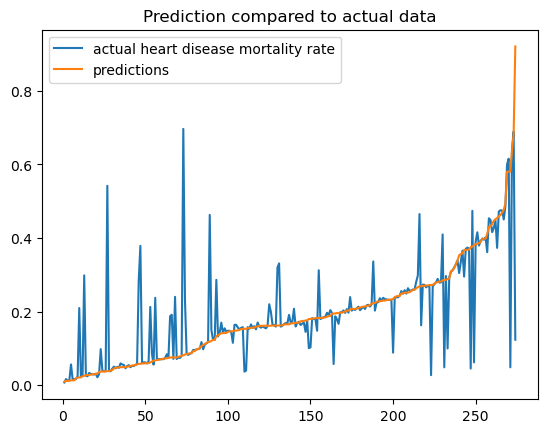

In [279]:
y_test = y_test['Heart Disease Mortality Rate'].values
# Get the indices that would sort the 'values' array
sorted_indices = np.argsort(y_pred)


# Sort both arrays using the sorted indices
sorted_y_test = y_test[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

x = np.arange(1, 275)
plt.title("Prediction compared to actual data")
plt.plot(x,sorted_y_test,label='actual heart disease mortality rate')
plt.plot(x,sorted_y_pred,label='predictions')
plt.legend()
plt.show()

We can also use our trained model to tell us which features had the biggest impact on heart disease mortality, with smoking being the biggest predictor by a huge margin.

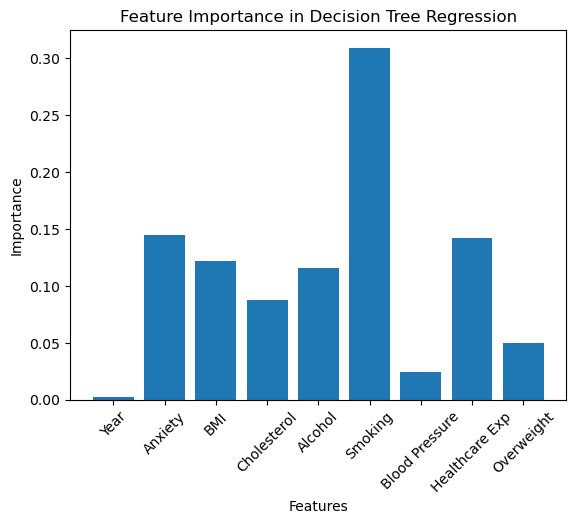

In [269]:
feature_importances = model.feature_importances_
plt.title("Feature Importance in Decision Tree Regression")
plt.bar(['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 
'Smoking', 'Blood Pressure', 'Healthcare Exp','Overweight'],feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

Typically, decision trees are used in classification problems of a few features, and smaller datasets. 
One strength of them is that they don't require large amounts of data to make accurate predictions.
However, in our example we have 9 features and over 1000 entries. This results in several levels to the tree.
For this reason we have decided to use a visual that shortens our tree to only 4 levels. 
Note how each node of the tree is able to handle continuous values, by classifying them as 
lesser than or greater than the value chosen as the split.

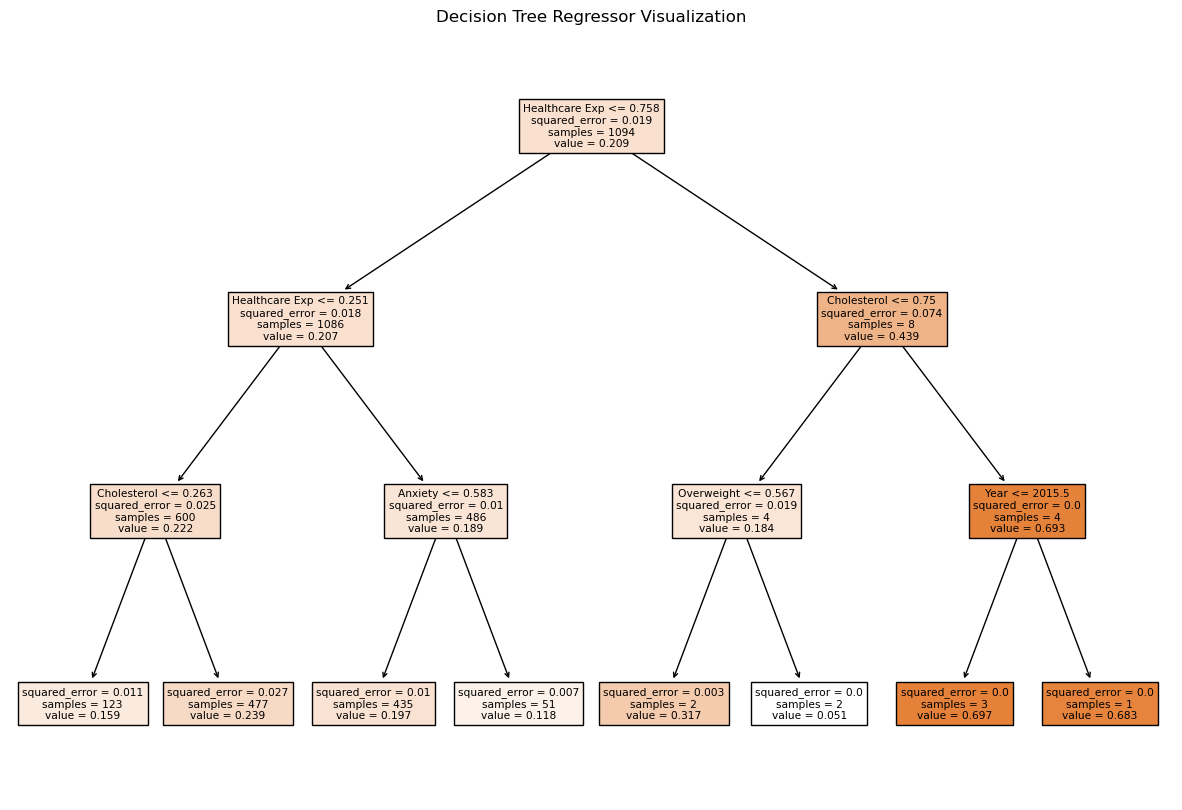

In [270]:
model_draw = DecisionTreeRegressor(max_depth=3, random_state=42)
model_draw.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_draw.predict(X_test)
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_draw, filled=True, feature_names= ['Year', 'Anxiety', 'BMI', 'Cholesterol', 'Alcohol', 'Smoking', 'Blood Pressure', 'Healthcare Exp', 'Overweight','Heart Disease Mortality Rate'])
plt.title("Decision Tree Regressor Visualization")
plt.show()